# **NFL Punt Data Analytics**

### **Cleaning and Pre-Analysis**

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns

Data Frame Capping 

In [3]:
# Get rid of Cap for EDA

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# Put it Back

pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

#### **NFL Punt Data Analytics -- Cleaning and EDA**

In [4]:
punt_game_data = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/Punt Analytics/game_data.csv")
punt_play_information = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/Punt Analytics/play_information.csv")
punt_vid_footage_injury = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/Punt Analytics/video_footage-injury.csv")
punt_vid_review = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/Punt Analytics/video_review.csv")
ngs = punt_vid_review = pd.read_csv("/Users/leemcfarling/Documents/BU Grad School/Semester Two /AI for Leaders/NFL_Stats/Punt Analytics/ngs.csv")


In [5]:
print(f"There are {len(punt_game_data):,} rows in the punt_game_data  Dataset.")
print(f"There are {len(punt_play_information):,} rows in the punt_play_information  Dataset.")
print(f"There are {len(punt_vid_footage_injury):,} rows in the punt_vid_footage_injury Dataset") 
print(f"There are {len(punt_vid_review):,} rows in the punt_vid_review Dataset") 

There are 666 rows in the punt_game_data  Dataset.
There are 6,681 rows in the punt_play_information  Dataset.
There are 37 rows in the punt_vid_footage_injury Dataset
There are 66,492,490 rows in the punt_vid_review Dataset


#### **Next Gen Statistics Aggregation**
- Developed with help from ChatGPT -- https://chatgpt.com/share/67caff72-ebf0-800f-a1d6-e162bf42afab

In [79]:
def aggregate_player_tracking_data(df, group_cols, id_columns):
    id_columns = [col for col in id_columns if col in df.columns]
    numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col not in id_columns]

    def first_non_nan(series):
        return series.dropna().iloc[0] if not series.dropna().empty else 'NA'
    agg_rules = {
        **{col: 'mean' for col in numeric_cols},  # Mean for numeric columns
        **{col: first_non_nan for col in df.columns if col not in numeric_cols}  # First valid value for others
    }
    
    result = df.groupby(group_cols, dropna=False).agg(agg_rules)
    # result_reset_index = result.reset_index()
    return result

In [81]:
id_cols = ['Event']  # ID columns
groupby_cols = ['GameKey','PlayID', 'GSISID']  # Grouping columns
NGSWeekData = [ngs]


processed_dfs = [aggregate_player_tracking_data(d, groupby_cols, id_cols) for d in NGSWeekData]
# final_df = pd.concat(processed_dfs, ignore_index=True)
# merged_df = final_df.merge(plays, on=['gameId', 'playId'], how='left')
len(processed_dfs)


1

In [92]:
check = ngs.groupby(['Season_Year', 'GameKey','PlayID', 'Time']).count().sort_values(by='GSISID', ascending=False)
check

GSISID   x   y  dis   o  \
Season_Year GameKey PlayID Time                                               
1           360     2050   2017-08-20 21:27:29.700      92  92  92   92  92   
                           2017-08-20 21:27:29.500      92  92  92   92  92   
                           2017-08-20 21:27:29.600      92  92  92   92  92   
                           2017-08-20 21:27:29.400      92  92  92   92  92   
                           2017-08-20 21:27:29.100      91  91  91   91  91   
...                                                    ...  ..  ..  ...  ..   
            457     4582   2017-10-01 23:11:01.800       1   1   1    1   1   
                           2017-10-01 23:11:01.700       1   1   1    1   1   
                           2017-10-01 23:11:01.600       1   1   1    1   1   
                           2017-10-01 23:11:01.500       1   1   1    1   1   
0           89      4662   2016-09-18 20:13:09.800       1   1   1    1   1   

                                                    dir  Event  
Season_Year GameKey PlayID Time                                 
1           360     2050   2017-08-20 21:27:29.700   92     92  
                           2017-08-20 21:27:29.500   92      0  
                           2017-08-20 21:27:29.600   92      0  
                           2017-08-20 21:27:29.400   92      0  
                           2017-08-20 21:27:29.100   91      0  
...                                                 ...    ...  
            457     4582   2017-10-01 23:11:01.800    1      0  
                           2017-10-01 23:11:01.700    1      0  
                           2017-10-01 23:11:01.600    1      0  
                           2017-10-01 23:11:01.500    1      0  
0           89      4662   2016-09-18 20:13:09.800    1      0  

[2392158 rows x 7 columns]

## **Why Next Gen Stats will not be included moving forward**


There is a fundamental issue with integrating Next Gen Stats (NGS) player tracking data with the existing play-level data from the NFL. The NFL’s play-level data provides specific details about a play, such as:
- Who was involved (e.g., “Player A passed to Player B”)
- What happened (e.g., “Player C was injured during the play”)
- Play outcomes (e.g., “The pass was incomplete, intercepted, or resulted in a touchdown”)

However, Next Gen Stats (NGS) tracks every player’s movement for every play across the entire season. This creates a challenge because:

1. **Plays Are Repeated Multiple Times**
    - A particular play design (e.g., a screen pass from Player A to Player B) might be executed 50+ times over 8 weeks.
    - The play description only summarizes one instance, but the same play can have different outcomes each time it’s run.
2. **Injury Events Are Not Tied to a Specific Instance of the Play**
    - If a single instance of the play resulted in an injury, but it was run dozens or hundreds of times, there’s no way to determine exactly which instance caused the injury.
    - The injury-related play-level data does not provide a unique identifier to match the exact play occurrence to a specific NGS-tracked instance.
3. **Averaging NGS Data Leads to Misrepresentation**
    - If we aggregate player tracking data for every instance of a play, we would be averaging field positions, speeds, accelerations, and other NGS metrics across all occurrences of the play.
    - This results in a dataset where the movement and positioning data do not correspond to the actual injury event—they are instead a generalized average of all times that play was executed.
    - As a result, the NGS data cannot reliably be incorporated into injury statistics because it would not reflect the specific instance when the injury actually occurred.

**Conclusion**

Since we cannot directly link an injury to a specific play occurrence, incorporating averaged NGS data into injury analysis would be misleading. For this reason, Next Gen Stats will not be included in the injury statistics to avoid drawing inaccurate conclusions.

⸻


In [6]:
punt_play_information

,Season_Year,Season_Type,GameKey,Game_Date,Week,PlayID,Game_Clock,YardLine,Quarter,Play_Type,Poss_Team,Home_Team_Visit_Team,Score_Home_Visiting,PlayDescription
0,2016,Pre,2,08/13/2016,2,191,12:30,LA 47,1,Punt,LA,LA-DAL,0 - 7,"(12:30) J.Hekker punts 52 yards to DAL 1, Cent..."
1,2016,Pre,2,08/13/2016,2,1132,12:08,LA 29,2,Punt,LA,LA-DAL,7 - 21,"(12:08) J.Hekker punts 51 yards to DAL 20, Cen..."
2,2016,Pre,2,08/13/2016,2,1227,10:01,DAL 18,2,Punt,DAL,LA-DAL,7 - 21,"(10:01) C.Jones punts 40 yards to LA 42, Cente..."
3,2016,Pre,2,08/13/2016,2,1864,00:21,DAL 46,2,Punt,LA,LA-DAL,7 - 24,"(:21) J.Hekker punts 31 yards to DAL 15, Cente..."
4,2016,Pre,2,08/13/2016,2,2247,10:26,DAL 15,3,Punt,DAL,LA-DAL,14 - 24,"(10:26) M.Wile punts 40 yards to LA 45, Center..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6676,2017,Post,664,01/21/2018,3,1046,12:07,MIN 33,2,Punt,MIN,PHI-MIN,14 - 7,"(12:07) R.Quigley punts 47 yards to PHI 20, Ce..."
6677,2017,Post,664,01/21/2018,3,1206,09:27,PHI 44,2,Punt,PHI,PHI-MIN,14 - 7,"(9:27) D.Jones punts 41 yards to MIN 15, Cente..."
6678,2017,Post,664,01/21/2018,3,1854,00:38,MIN 47,2,Punt,MIN,PHI-MIN,21 - 7,"(:38) R.Quigley punts 53 yards to end zone, Ce..."
6679,2017,Post,664,01/21/2018,3,3168,09:45,PHI 45,4,Punt,PHI,PHI-MIN,38 - 7,"(9:45) D.Jones punts 45 yards to MIN 10, Cente..."


In [7]:
punt_game_data.head(5)

,GameKey,Season_Year,Season_Type,Week,Game_Date,Game_Day,Game_Site,Start_Time,Home_Team,HomeTeamCode,Visit_Team,VisitTeamCode,Stadium,StadiumType,Turf,GameWeather,Temperature,OutdoorWeather
0,1,2016,Pre,1,2016-08-07 00:00:00.000,Sunday,Indianapolis,20:00,Indianapolis Colts,IND,Green Bay Packers,GB,Tom Benson Hall of Fame Stadium,Outdoor,Turf,NaN,NaN,NaN
1,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,LA,Dallas Cowboys,DAL,Los Angeles Memorial Coliseum,Outdoor,Grass,Sunny,79.0,Sunny
2,3,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Baltimore,19:30,Baltimore Ravens,BLT,Carolina Panthers,CAR,M&T Bank Stadium,Outdoor,Natural Grass,Party Cloudy,94.0,Partly Cloudy
3,4,2016,Pre,2,2016-08-12 00:00:00.000,Friday,Green Bay,19:00,Green Bay Packers,GB,Cleveland Browns,CLV,Lambeau Field,Outdoor,DD GrassMaster,NaN,73.0,NaN
4,5,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Chicago,19:00,Chicago Bears,CHI,Denver Broncos,DEN,Soldier Field,Outdoor,Grass,"Partly Cloudy, Chance of Rain 80%",88.0,NaN


In [8]:
punt_play_information.head(3)

,Season_Year,Season_Type,GameKey,Game_Date,Week,PlayID,Game_Clock,YardLine,Quarter,Play_Type,Poss_Team,Home_Team_Visit_Team,Score_Home_Visiting,PlayDescription
0,2016,Pre,2,08/13/2016,2,191,12:30,LA 47,1,Punt,LA,LA-DAL,0 - 7,"(12:30) J.Hekker punts 52 yards to DAL 1, Cent..."
1,2016,Pre,2,08/13/2016,2,1132,12:08,LA 29,2,Punt,LA,LA-DAL,7 - 21,"(12:08) J.Hekker punts 51 yards to DAL 20, Cen..."
2,2016,Pre,2,08/13/2016,2,1227,10:01,DAL 18,2,Punt,DAL,LA-DAL,7 - 21,"(10:01) C.Jones punts 40 yards to LA 42, Cente..."


In [9]:
len(punt_vid_footage_injury)

37

In [10]:
punt_vid_review

,Season_Year,GameKey,PlayID,GSISID,Time,x,y,dis,o,dir,Event
0,0,3,3949,33078,2016-08-12 02:27:11.100,58.32,12.90,0.00,347,64,NaN
1,0,3,3949,24417,2016-08-12 02:27:11.100,56.74,13.85,0.02,18,359,NaN
2,0,3,3949,32570,2016-08-12 02:27:11.100,50.78,0.34,0.09,286,185,NaN
3,0,3,3949,27831,2016-08-12 02:27:11.200,59.34,12.33,0.05,325,294,NaN
4,0,3,3949,32575,2016-08-12 02:27:11.200,52.95,-0.37,0.03,322,145,NaN
...,...,...,...,...,...,...,...,...,...,...,...
66492485,1,656,1443,30528,2018-01-07 02:18:19.500,37.64,4.67,0.31,299,22,NaN
66492486,1,656,1443,31279,2018-01-07 02:18:19.500,40.67,53.17,0.17,123,213,NaN
66492487,1,656,1443,27691,2018-01-07 02:18:19.500,21.75,11.47,0.42,274,7,NaN
66492488,1,656,1443,32382,2018-01-07 02:18:19.500,50.91,27.03,0.19,272,0,NaN


#### **Next, let's get a handle on Injury Data in the Datasets**

In [11]:
punt_play_information[punt_play_information['PlayDescription'].str.contains("inju")].count().head(1)

Season_Year    92
dtype: int64

In [12]:
punt_vid_footage_injury.count().head(1)

season    37
dtype: int64

Interesting -- so the punt_video_review_injury information has less records than the punt play information. My first hunch on this is that there may only be 37 / 92 injuries that have video reviews in place but we will have to see. 

### **Duplicate and Null Fields Analysis**

In [13]:
punt_game_data.describe()

,GameKey,Season_Year,Week,Temperature
count,666.000000,666.000000,666.000000,600.000000
mean,333.500000,2016.500000,7.723724,64.131667
std,192.401923,0.500376,5.060709,18.563818
min,1.000000,2016.000000,1.000000,1.000000
25%,167.250000,2016.000000,3.000000,54.000000
50%,333.500000,2016.500000,6.000000,68.000000
75%,499.750000,2017.000000,12.000000,78.250000
max,666.000000,2017.000000,17.000000,97.000000


In [14]:
punt_game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GameKey         666 non-null    int64  
 1   Season_Year     666 non-null    int64  
 2   Season_Type     666 non-null    object 
 3   Week            666 non-null    int64  
 4   Game_Date       666 non-null    object 
 5   Game_Day        666 non-null    object 
 6   Game_Site       666 non-null    object 
 7   Start_Time      666 non-null    object 
 8   Home_Team       666 non-null    object 
 9   HomeTeamCode    666 non-null    object 
 10  Visit_Team      666 non-null    object 
 11  VisitTeamCode   666 non-null    object 
 12  Stadium         666 non-null    object 
 13  StadiumType     628 non-null    object 
 14  Turf            665 non-null    object 
 15  GameWeather     568 non-null    object 
 16  Temperature     600 non-null    float64
 17  OutdoorWeather  412 non-null    obj

Interesting -- looks like there are some null fields in the columns: Stadium Type, GameWeather, Temperature, and OutdoorWeather. Let's look a little further into it. 

In [15]:
punt_game_data[punt_game_data['OutdoorWeather'].isnull()]

,GameKey,Season_Year,Season_Type,Week,Game_Date,Game_Day,Game_Site,Start_Time,Home_Team,HomeTeamCode,Visit_Team,VisitTeamCode,Stadium,StadiumType,Turf,GameWeather,Temperature,OutdoorWeather
0,1,2016,Pre,1,2016-08-07 00:00:00.000,Sunday,Indianapolis,20:00,Indianapolis Colts,IND,Green Bay Packers,GB,Tom Benson Hall of Fame Stadium,Outdoor,Turf,NaN,NaN,NaN
3,4,2016,Pre,2,2016-08-12 00:00:00.000,Friday,Green Bay,19:00,Green Bay Packers,GB,Cleveland Browns,CLV,Lambeau Field,Outdoor,DD GrassMaster,NaN,73.0,NaN
4,5,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Chicago,19:00,Chicago Bears,CHI,Denver Broncos,DEN,Soldier Field,Outdoor,Grass,"Partly Cloudy, Chance of Rain 80%",88.0,NaN
6,7,2016,Pre,2,2016-08-14 00:00:00.000,Sunday,Santa Clara,16:00,San Francisco 49ers,SF,Houston Texans,HST,Levis Stadium,Outdoor,Natural grass,Sunny,84.0,NaN
9,10,2016,Pre,2,2016-08-12 00:00:00.000,Friday,East Rutherford,19:00,New York Giants,NYG,Miami Dolphins,MIA,MetLife Stadium,NaN,UBU Speed Series-S5-M,Mostly Cloudy,76.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,657,2017,Post,1,2018-01-07 00:00:00.000,Sunday,Jacksonville,13:05,Jacksonville Jaguars,JAX,Buffalo Bills,BUF,EverBank Field,Open,Grass,NaN,53.0,NaN
659,660,2017,Post,2,2018-01-13 00:00:00.000,Saturday,Foxborough,20:15,New England Patriots,NE,Tennessee Titans,TEN,Gillette Stadium,Outdoor,Field Turf,Clear and Cold,24.0,NaN
661,662,2017,Post,2,2018-01-14 00:00:00.000,Sunday,Minneapolis,15:40,Minnesota Vikings,MIN,New Orleans Saints,NO,U.S. Bank Stadium,Indoors,Field Turf,Indoors,NaN,NaN
662,663,2017,Post,3,2018-01-21 00:00:00.000,Sunday,Foxborough,15:05,New England Patriots,NE,Jacksonville Jaguars,JAX,Gillette Stadium,Outdoor,Field Turf,Clear and cool,48.0,NaN


So at first glance, it looks like the fields were just missed sometimes, rather than some sort of consistent error. 

Next, let's look into the punt play data. 

In [16]:
punt_play_information.describe()

,Season_Year,GameKey,Week,PlayID,Quarter
count,6681.000000,6681.000000,6681.000000,6681.000000,6681.000000
mean,2016.508307,332.349050,7.676396,2015.584493,2.492142
std,0.499968,193.838081,5.079611,1191.913172,1.117219
min,2016.000000,2.000000,1.000000,76.000000,1.000000
25%,2016.000000,164.000000,3.000000,958.000000,2.000000
50%,2017.000000,339.000000,6.000000,1983.000000,2.000000
75%,2017.000000,501.000000,12.000000,3001.000000,3.000000
max,2017.000000,665.000000,17.000000,5285.000000,5.000000


In [17]:
punt_play_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6681 entries, 0 to 6680
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Season_Year           6681 non-null   int64 
 1   Season_Type           6681 non-null   object
 2   GameKey               6681 non-null   int64 
 3   Game_Date             6681 non-null   object
 4   Week                  6681 non-null   int64 
 5   PlayID                6681 non-null   int64 
 6   Game_Clock            6681 non-null   object
 7   YardLine              6681 non-null   object
 8   Quarter               6681 non-null   int64 
 9   Play_Type             6681 non-null   object
 10  Poss_Team             6681 non-null   object
 11  Home_Team_Visit_Team  6681 non-null   object
 12  Score_Home_Visiting   6681 non-null   object
 13  PlayDescription       6681 non-null   object
dtypes: int64(5), object(9)
memory usage: 730.9+ KB


Looks like there are no null values in this dataset -- There might be some Nan's etc. but we will look into that later. 

In [18]:
punt_vid_footage_injury.head(5)

,season,Type,Week,Home_team,Visit_Team,Qtr,PlayDescription,gamekey,playid,PREVIEW LINK (5000K)
0,2016,Pre,2,Chicago Bears,Denver Broncos,3,(3:44) (Punt formation) P.O'Donnell punts 58 y...,56840,3129,http://a.video.nfl.com//films/vodzilla/153233/...
1,2016,Pre,3,Tennessee Titans,Carolina Panthers,3,(5:52) (Punt formation) K.Redfern punts 36 yar...,56856,2587,http://a.video.nfl.com//films/vodzilla/153234/...
2,2016,Pre,3,Washington Redskins,New York Jets,1,"(4:46) L.Edwards punts 51 yards to WAS 27, Cen...",56864,538,http://a.video.nfl.com//films/vodzilla/153235/...
3,2016,Pre,4,New York Jets,New York Giants,2,"(8:29) B.Wing punts 44 yards to NYJ 10, Center...",56880,1212,http://a.video.nfl.com//films/vodzilla/153236/...
4,2016,Pre,5,Detroit Lions,Buffalo Bills,1,"(:38) C.Schmidt punts 46 yards to DET 8, Cente...",56895,905,http://a.video.nfl.com//films/vodzilla/153237/...


In [19]:
punt_vid_footage_injury.describe()

,season,Week,Qtr,gamekey,playid
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,2016.486486,8.621622,2.621622,57158.216216,2185.675676
std,0.506712,5.095485,0.953105,183.869842,1036.877981
min,2016.000000,1.000000,1.000000,56840.000000,183.000000
25%,2016.000000,4.000000,2.000000,57053.000000,1262.000000
50%,2016.000000,8.000000,3.000000,57131.000000,2341.000000
75%,2017.000000,14.000000,3.000000,57283.000000,2918.000000
max,2017.000000,16.000000,4.000000,57453.000000,3746.000000


In [20]:
punt_vid_footage_injury.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   season                37 non-null     int64 
 1   Type                  37 non-null     object
 2   Week                  37 non-null     int64 
 3   Home_team             37 non-null     object
 4   Visit_Team            37 non-null     object
 5   Qtr                   37 non-null     int64 
 6   PlayDescription       37 non-null     object
 7   gamekey               37 non-null     int64 
 8   playid                37 non-null     int64 
 9   PREVIEW LINK (5000K)  37 non-null     object
dtypes: int64(5), object(5)
memory usage: 3.0+ KB


In [21]:
punt_vid_review.head(5)

,Season_Year,GameKey,PlayID,GSISID,Time,x,y,dis,o,dir,Event
0,0,3,3949,33078,2016-08-12 02:27:11.100,58.32,12.90,0.00,347,64,NaN
1,0,3,3949,24417,2016-08-12 02:27:11.100,56.74,13.85,0.02,18,359,NaN
2,0,3,3949,32570,2016-08-12 02:27:11.100,50.78,0.34,0.09,286,185,NaN
3,0,3,3949,27831,2016-08-12 02:27:11.200,59.34,12.33,0.05,325,294,NaN
4,0,3,3949,32575,2016-08-12 02:27:11.200,52.95,-0.37,0.03,322,145,NaN


In [22]:
punt_vid_review.describe()

,Season_Year,GameKey,PlayID,GSISID,x,y,dis,o,dir
count,6.649249e+07,6.649249e+07,6.649249e+07,6.649249e+07,6.649249e+07,6.649249e+07,6.649249e+07,6.649249e+07,6.649249e+07
mean,5.113878e-01,3.355454e+02,2.002468e+03,3.066009e+04,6.002641e+01,2.654342e+01,2.008917e-01,1.795764e+02,1.792785e+02
std,4.998703e-01,1.933431e+02,1.184486e+03,2.455999e+03,2.153727e+01,1.514342e+01,2.248243e-01,1.062313e+02,1.042783e+02
min,0.000000e+00,3.000000e+00,7.600000e+01,-1.000000e+00,-9.560000e+00,-2.117000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.670000e+02,9.580000e+02,2.931900e+04,4.359000e+01,1.816000e+01,4.000000e-02,9.000000e+01,8.900000e+01
50%,1.000000e+00,3.430000e+02,1.930000e+03,3.126200e+04,6.010000e+01,2.661000e+01,1.300000e-01,1.790000e+02,1.790000e+02
75%,1.000000e+00,5.030000e+02,2.980000e+03,3.252500e+04,7.643000e+01,3.473000e+01,2.700000e-01,2.700000e+02,2.690000e+02
max,1.000000e+00,6.650000e+02,5.285000e+03,3.405000e+04,1.308800e+02,7.031000e+01,1.803000e+01,3.600000e+02,3.600000e+02


In [23]:
punt_vid_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66492490 entries, 0 to 66492489
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Season_Year  int64  
 1   GameKey      int64  
 2   PlayID       int64  
 3   GSISID       int64  
 4   Time         object 
 5   x            float64
 6   y            float64
 7   dis          float64
 8   o            int64  
 9   dir          int64  
 10  Event        object 
dtypes: float64(3), int64(6), object(2)
memory usage: 5.4+ GB


Looks like there are a few null fields but nothing too significant. 

___

#### **Duplicated Rows:**

In [24]:
Punt_data_CSVs = {
    "punt_game_data": punt_game_data,
    "punt_play_information": punt_play_information,
    "punt_vid_footage_injury": punt_vid_footage_injury,
    "punt_vid_review": punt_vid_review
}

for name, punt in Punt_data_CSVs.items():
    print(f"In the {name} dataset, there are {punt.duplicated().sum()} duplicate rows.")

In the punt_game_data dataset, there are 0 duplicate rows.
In the punt_play_information dataset, there are 0 duplicate rows.
In the punt_vid_footage_injury dataset, there are 0 duplicate rows.
In the punt_vid_review dataset, there are 0 duplicate rows.


#### **Duplicated Rows per Column**

In [25]:
def duplicates_per_column(df):
    for col in df.columns: 
        duplicate_counts = df.groupby(col).size().reset_index(name='Count')
        duplicate_counts = duplicate_counts[duplicate_counts["Count"] > 1]

        if duplicate_counts.empty: 
            print(f"No Duplicates in {col}")
        else:
            print(f"Duplicates found in: {col}")
            print(duplicate_counts)
            print()
            print()

In [26]:
duplicates_per_column(punt_game_data)

No Duplicates in GameKey
Duplicates found in: Season_Year
   Season_Year  Count
0         2016    333
1         2017    333


Duplicates found in: Season_Type
  Season_Type  Count
0        Post     24
1         Pre    130
2         Reg    512


Duplicates found in: Week
    Week  Count
0      1     41
1      2     72
2      3     68
3      4     65
4      5     62
5      6     29
6      7     30
7      8     26
8      9     26
9     10     28
10    11     28
11    12     32
12    13     31
13    14     32
14    15     32
15    16     32
16    17     32


Duplicates found in: Game_Date
                   Game_Date  Count
1    2016-08-11 00:00:00.000      6
2    2016-08-12 00:00:00.000      5
3    2016-08-13 00:00:00.000      4
5    2016-08-18 00:00:00.000      6
6    2016-08-19 00:00:00.000      3
..                       ...    ...
138  2018-01-06 00:00:00.000      2
139  2018-01-07 00:00:00.000      2
140  2018-01-13 00:00:00.000      2
141  2018-01-14 00:00:00.000      2
142  2018-01

So drilling into the data a little more, it looks like the OutdoorWeather column will need some pre-processing along with the GameWeather column, and the StadiumType column as well -- This would make this dataset very similar to the InjuryRecord dataset that was analyzed earlier. 


Additionally, it looks like either 00:00:00.000 is used as a default when the time is incorrectly input, or there can be up to 6 different games playing on a single day. 

In [27]:
duplicates_per_column(punt_play_information)

Duplicates found in: Season_Year
   Season_Year  Count
0         2016   3285
1         2017   3396


Duplicates found in: Season_Type
  Season_Type  Count
0        Post    196
1         Pre   1462
2         Reg   5023


Duplicates found in: GameKey
     GameKey  Count
0          2      9
1          3      6
2          4     11
3          5     14
4          6     11
..       ...    ...
656      660     12
657      661      6
658      662      8
659      663     12
660      664      6

[661 rows x 2 columns]


Duplicates found in: Game_Date
      Game_Date  Count
0    01/01/2017    158
1    01/06/2018     19
2    01/07/2017     29
3    01/07/2018     24
4    01/08/2017     19
..          ...    ...
137  12/24/2017    121
138  12/25/2016     18
139  12/25/2017     23
140  12/26/2016      9
141  12/31/2017    200

[141 rows x 2 columns]


Duplicates found in: Week
    Week  Count
0      1    394
1      2    763
2      3    695
3      4    665
4      5    639
5      6    277
6      7    28

We're going to have to vet the number of records of each of these datasets -- This says that there are close to 6600 punts in just two NFL seasons. 

In [28]:
duplicates_per_column(punt_vid_footage_injury)

Duplicates found in: season
   season  Count
0    2016     19
1    2017     18


Duplicates found in: Type
  Type  Count
0  Pre     12
1  Reg     25


Duplicates found in: Week
    Week  Count
0      1      2
2      3      5
3      4      2
4      5      6
5      6      2
8     11      2
9     12      3
10    13      2
11    14      2
12    15      7


Duplicates found in: Home_team
              Home_team  Count
1      Baltimore Ravens      2
6        Denver Broncos      2
8        Houston Texans      2
9    Indianapolis Colts      2
11   Kansas City Chiefs      3
12       Miami Dolphins      2
16        New York Jets      2
20     Seattle Seahawks      2
21     Tennessee Titans      3
22  Washington Redskins      4


Duplicates found in: Visit_Team
              Visit_Team  Count
0       Baltimore Ravens      2
2      Carolina Panthers      4
4         Denver Broncos      2
5      Green Bay Packers      2
6         Houston Texans      2
7   Jacksonville Jaguars      4
8     Kansas Ci

In [29]:
duplicates_per_column(punt_vid_review)

Duplicates found in: Season_Year
   Season_Year     Count
0            0  32489045
1            1  34003445


Duplicates found in: GameKey
     GameKey   Count
0          3  108731
1          4   86780
2          5   86945
3          6  106839
4          7  111600
..       ...     ...
655      661   58182
656      662   76730
657      663   72048
658      664   71449
659      665   12336

[660 rows x 2 columns]


Duplicates found in: PlayID
      PlayID  Count
0         76  17707
1        110   8325
2        112  27975
3        113  22026
4        114  13867
...      ...    ...
3268    5018  27843
3269    5058   6246
3270    5178   9412
3271    5198   3206
3272    5285   4235

[3273 rows x 2 columns]


Duplicates found in: GSISID
      GSISID  Count
0         -1   2536
1       4091   2387
2      16919   1407
3      19596  12718
4      19646   1579
...      ...    ...
3640   34045     58
3641   34046   3385
3642   34047     35
3643   34048    209
3644   34050   2077

[3644 rows x 2 colu

In [30]:
Punt_data_CSVs = {
    "punt_game_data": punt_game_data,
    "punt_play_information": punt_play_information,
    "punt_vid_footage_injury": punt_vid_footage_injury,
    "punt_vid_review": punt_vid_review
}

def mean_median_mode(df):
    categorical_columns = []  
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  
            print(f"Column Name: {col}")
            print(f"Mean: {df[col].mean():.2f}")
            print(f"Median: {df[col].median()}")

            mode_values = df[col].mode()
            mode_display = mode_values[0] if not mode_values.empty else "No Mode"
            print(f"Mode: {mode_display}")
            print()
            print("-" * 30)

        else:
            categorical_columns.append(col)

    print(f"Categorical Columns: {categorical_columns}")


for name, punt_df in Punt_data_CSVs.items(): 
    print(f"\n=======Analysis of Dataset '{name}' =======\n")
    mean_median_mode(punt_df)


=======Analysis of Dataset 'punt_game_data' =======

Column Name: GameKey
Mean: 333.50
Median: 333.5
Mode: 1

------------------------------
Column Name: Season_Year
Mean: 2016.50
Median: 2016.5
Mode: 2016

------------------------------
Column Name: Week
Mean: 7.72
Median: 6.0
Mode: 2

------------------------------
Column Name: Temperature
Mean: 64.13
Median: 68.0
Mode: 68.0

------------------------------
Categorical Columns: ['Season_Type', 'Game_Date', 'Game_Day', 'Game_Site', 'Start_Time', 'Home_Team', 'HomeTeamCode', 'Visit_Team', 'VisitTeamCode', 'Stadium', 'StadiumType', 'Turf', 'GameWeather', 'OutdoorWeather']

=======Analysis of Dataset 'punt_play_information' =======

Column Name: Season_Year
Mean: 2016.51
Median: 2017.0
Mode: 2017

------------------------------
Column Name: GameKey
Mean: 332.35
Median: 339.0
Mode: 187

------------------------------
Column Name: Week
Mean: 7.68
Median: 6.0
Mode: 2

------------------------------
Column Name: PlayID
Mean: 2015.58
Median: 

___

## **Weather Data Standardization**


In [31]:
punt_game_data['GameWeather'].unique()

array([nan, 'Sunny', 'Party Cloudy', 'Partly Cloudy, Chance of Rain 80%',
       'Partly Cloudy', 'T-Storms', 'Cloudy', 'Mostly Cloudy',
       'Hazy, hot and humid', 'Indoor', 'Clear and warm',
       'Controlled Climate', 'Suny', 'Chance of Showers',
       'Mostly Clear. Gusting ot 14.', 'Indoors', 'Mostly cloudy',
       'Cloudy with Possible Stray Showers/Thundershowers',
       'Mostly CLoudy', 'Clear', 'Partly sunny', 'Rain', 'Mostly Sunny',
       'Sunny and Clear', 'Partly CLoudy',
       'Cloudy, Humid, Chance of Rain', 'Sunny Intervals', 'Fair',
       'Controlled', 'Sunny Skies', 'Partly Sunny', 'Sunny intervals',
       'Clear Skies', 'Clear and cool', 'Cloudy with rain',
       'Snow Showers, 3 to 5 inches expected.', 'Sunny and cool',
       'Snow showers', 'Snow', 'Partly cloudy', 'Cloudy, steady temps',
       'Cloudy, Rain', 'Cloudy and Cold', 'Cloudy with patches of fog',
       'Scattered thunderstorms', 'Sunny and warm', 'cloudy',
       'Light Rain', 'Partly cloud

In [32]:
weather_mapping = {
    # Sunny
    "Clear and warm": "Sunny",
    "Sunny": "Sunny",
    "Clear": "Sunny",
    "Clear Skies": "Sunny",
    "Clear and Cool": "Sunny",
    "Clear and Sunny": "Sunny",
    "Clear and cold": "Sunny",
    "Fair": "Sunny",
    "Sunny and cold": "Sunny",
    "Mostly Sunny": "Sunny",
    "Clear skies": "Sunny",
    "Sunny Skies": "Sunny",
    "Sunny and warm": "Sunny",
    "Sunny and clear": "Sunny",
    "Sunny, Windy": "Sunny",
    "Sunny, highs to upper 80s": "Sunny", 
    "Clear and sunny": "Sunny",
    "Suny": "Sunny",
    "Clear and cool": "Sunny",
    "CLEAR" : "Sunny", 
    "Clear and Cold" : "Sunny",
    "Sunny and cool" : "Sunny",
    "Sunny and Clear" : "Sunny",

    # Partly Cloudy
    "Partly cloudy": "Partly Cloudy",
    "Mostly Sunny Skies": "Partly Cloudy",
    "Mostly sunny": "Partly Cloudy",
    "Partly Sunny": "Partly Cloudy",
    "Partly sunny": "Partly Cloudy",
    "Party Cloudy": "Partly Cloudy",
    "Partly Cloudy": "Partly Cloudy",
    "Partly clear": "Partly Cloudy",
    "Sun & clouds": "Partly Cloudy",
    "Clear to Partly Cloudy": "Partly Cloudy",
    "Partly Clouidy" : "Partly Cloudy",
    "Mostly Clear. Gusting ot 14.": "Partly Cloudy",
    "Sunny Intervals" : "Partly Cloudy",
    "Sunny intervals" : "Partly Cloudy",
    "Partly cloudy, lows to upper 50s.": "Partly Cloudy", 
    "Partly CLoudy": "Partly Cloudy",

    # Cloudy
    "Cloudy": "Cloudy",
    "Cloudy and cold": "Cloudy",
    "Mostly Cloudy": "Cloudy",
    "Cloudy and Cool": "Cloudy",
    "Mostly Coudy": "Cloudy",
    "cloudy": "Cloudy",
    "Coudy": "Cloudy",
    "Mostly cloudy": "Cloudy",
    "Overcast": "Cloudy",
    "Cloudy, chance of rain" : "Cloudy" ,   
    "Chance of Showers" : "Cloudy",
    "Mostly CLoudy": "Cloudy", 
    "Cloudy, Humid, Chance of Rain": "Cloudy",
    "Cloudy, steady temps": "Cloudy", 
    "Cloudy and Cold": "Cloudy",

    # Rain
    "Scattered Showers" : "Rain",
    "Rainy": "Rain",
    "Rain": "Rain",
    "Rain Chance 40%": "Rain",
    "Showers": "Rain",
    "30% Chance of Rain": "Rain",
    "Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.": "Rain",
    "Light Rain": "Rain",
    "chance of rain": "Rain",
    "Rain shower": "Rain",
    "Rain likely": "Rain",
    "Rain likely, temps in low 40s." : "Rain",
    "Cloudy, 50% change of rain" : "Rain",
    "Cloudy, Rain": "Rain",
    "50% change of rain": "Rain",
    "10% Chance of Rain": "Rain",
    "Cloudy with periods of rain": "Rain",
    "Partly Cloudy, Chance of Rain 80%": "Rain",
    "T-Storms" : "Rain",
    "Cloudy with Possible Stray Showers/Thundershowers": "Rain",
    "Cloudy with rain" : "Rain",
    "Scattered thunderstorms": "Rain",

    # Snow
    "Snow": "Snow",
    "Heavy lake effect snow": "Snow",
    "light snow accumulating 1-3": "Snow",
    "Cloudy, light snow accumulating 1-3": "Snow", 
    'Cloudy, light snow accumulating 1-3"': "Snow",
    "Snow Showers, 3 to 5 inches expected.": "Snow", 
    "Snow showers": "Snow",

    # Fog
    "Cloudy, fog started developing in 2nd quarter": "Fog",
    "Hazy": "Fog",
    "Cloudy with patches of fog": "Fog",
    

    # Unknown
    "nan": "Unknown",
    "temps in low 40s.": "Unknown",
    "Heat Index 95": "Unknown",
    "highs to upper 80s": "Unknown",
    "Cold": "Unknown",

    # N/A Indoors
    "N/A (Indoors)": "N/A (Indoors)",
    "Controlled Climate": "N/A (Indoors)",
    "N/A Indoor": "N/A (Indoors)",
    "Indoor": "N/A (Indoors)",
    "Indoors": "N/A (Indoors)", 
    "Controlled" : "N/A (Indoors)",

    # Haze
    "Hazy, hot and humid" : "Hazy"
}

punt_game_data['GameWeather'] = punt_game_data['GameWeather'].replace(weather_mapping).fillna("Unknown")
print(punt_game_data['GameWeather'].unique())

['Unknown' 'Sunny' 'Partly Cloudy' 'Rain' 'Cloudy' 'Hazy' 'N/A (Indoors)'
 'Snow' 'Fog']


And now let's do the same for Game Start times: 

In [33]:
GameTimeDict = {
    "20:00": "20:00",
    "17:00": "17:00",
    "19:30": "19:00",
    "19:00": "19:00",
    "16:00": "16:00",
    "15:30": "15:00",
    "18:00": "18:00",
    "14:00": "14:00",
    "12:00": "12:00",
    "15:00": "15:00",
    "18:30": "18:00",
    "13:00": "13:00",
    "13:05": "13:00",  
    "15:25": "15:00",  
    "16:25": "16:00",  
    "17:30": "17:00",
    "19:10": "19:00",  
    "19:20": "19:00",  
    "20:25": "20:00",  
    "14:25": "14:00",  
    "13:25": "13:00",  
    "16:05": "16:00",  
    "14:30": "14:00",  
    "20:30": "20:00",  
    "17:25": "17:00",  
    "14:05": "14:00",  
    "19:25": "19:00",  
    "13:30": "13:00",  
    "12:30": "12:00",  
    "15:35": "15:00",  
    "17:15": "17:00",  
    "15:40": "15:00",  
    "16:35": "16:00",  
    "20:15": "20:00",  
    "15:05": "15:00",  
    "18:40": "18:00",  
    "16:30": "16:00",  
    "18:10": "18:00",  
    "20:20": "20:00",  
    "18:25": "18:00",  
}

punt_game_data['Start_Time'] = punt_game_data['Start_Time'].replace(GameTimeDict)
print(punt_game_data['Start_Time'].unique())

['20:00' '17:00' '19:00' '16:00' '15:00' '18:00' '14:00' '12:00' '13:00']


In [34]:
punt_game_data

,GameKey,Season_Year,Season_Type,Week,Game_Date,Game_Day,Game_Site,Start_Time,Home_Team,HomeTeamCode,Visit_Team,VisitTeamCode,Stadium,StadiumType,Turf,GameWeather,Temperature,OutdoorWeather
0,1,2016,Pre,1,2016-08-07 00:00:00.000,Sunday,Indianapolis,20:00,Indianapolis Colts,IND,Green Bay Packers,GB,Tom Benson Hall of Fame Stadium,Outdoor,Turf,Unknown,NaN,NaN
1,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,LA,Dallas Cowboys,DAL,Los Angeles Memorial Coliseum,Outdoor,Grass,Sunny,79.0,Sunny
2,3,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Baltimore,19:00,Baltimore Ravens,BLT,Carolina Panthers,CAR,M&T Bank Stadium,Outdoor,Natural Grass,Partly Cloudy,94.0,Partly Cloudy
3,4,2016,Pre,2,2016-08-12 00:00:00.000,Friday,Green Bay,19:00,Green Bay Packers,GB,Cleveland Browns,CLV,Lambeau Field,Outdoor,DD GrassMaster,Unknown,73.0,NaN
4,5,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Chicago,19:00,Chicago Bears,CHI,Denver Broncos,DEN,Soldier Field,Outdoor,Grass,Rain,88.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,662,2017,Post,2,2018-01-14 00:00:00.000,Sunday,Minneapolis,15:00,Minnesota Vikings,MIN,New Orleans Saints,NO,U.S. Bank Stadium,Indoors,Field Turf,N/A (Indoors),NaN,NaN
662,663,2017,Post,3,2018-01-21 00:00:00.000,Sunday,Foxborough,15:00,New England Patriots,NE,Jacksonville Jaguars,JAX,Gillette Stadium,Outdoor,Field Turf,Sunny,48.0,NaN
663,664,2017,Post,3,2018-01-21 00:00:00.000,Sunday,Philadelphia,18:00,Philadelphia Eagles,PHI,Minnesota Vikings,MIN,Lincoln Financial Field,Outdoor,Grass,Cloudy,47.0,Cloudy
664,665,2017,Post,4,2018-02-04 00:00:00.000,Sunday,Minneapolis,17:00,New England Patriots,NE,Philadelphia Eagles,PHI,U.S. Bank Stadium,Indoor,Field Turf,Unknown,3.0,NaN


___

## **Merging Information**

Now let's try to merge the datasets into one table in an attempt to simplify this analysis. 


As for the 'Video Review' datasets -- both of them could be very useful for their specific analysis, however, the both are only 37 records long. While this may just be due to the extremely specific sampling conditions for those (Concussions that happened specifically during NFL punt plays). It's still not a great sample size for looking into the factors that contribute to injury occurance and *finding correlation* which is what the aim of this analysis is geared towards. 

For these reasons, for now at least, they will *not* be included 

In [35]:
game_data_for_merge = punt_game_data.drop(columns=['HomeTeamCode', 'VisitTeamCode'], axis=1)
play_information_for_merge = punt_play_information.drop(columns=['Season_Year', 'Season_Type', 'Week', 'Game_Date', 'Home_Team_Visit_Team'], axis=1)

merged_game_data = game_data_for_merge.merge(play_information_for_merge, on='GameKey', how='inner')
merged_game_data

,GameKey,Season_Year,Season_Type,Week,Game_Date,Game_Day,Game_Site,Start_Time,Home_Team,Visit_Team,...,Temperature,OutdoorWeather,PlayID,Game_Clock,YardLine,Quarter,Play_Type,Poss_Team,Score_Home_Visiting,PlayDescription
0,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,Dallas Cowboys,...,79.0,Sunny,191,12:30,LA 47,1,Punt,LA,0 - 7,"(12:30) J.Hekker punts 52 yards to DAL 1, Cent..."
1,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,Dallas Cowboys,...,79.0,Sunny,1132,12:08,LA 29,2,Punt,LA,7 - 21,"(12:08) J.Hekker punts 51 yards to DAL 20, Cen..."
2,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,Dallas Cowboys,...,79.0,Sunny,1227,10:01,DAL 18,2,Punt,DAL,7 - 21,"(10:01) C.Jones punts 40 yards to LA 42, Cente..."
3,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,Dallas Cowboys,...,79.0,Sunny,1864,00:21,DAL 46,2,Punt,LA,7 - 24,"(:21) J.Hekker punts 31 yards to DAL 15, Cente..."
4,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,Dallas Cowboys,...,79.0,Sunny,2247,10:26,DAL 15,3,Punt,DAL,14 - 24,"(10:26) M.Wile punts 40 yards to LA 45, Center..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6676,664,2017,Post,3,2018-01-21 00:00:00.000,Sunday,Philadelphia,18:00,Philadelphia Eagles,Minnesota Vikings,...,47.0,Cloudy,1046,12:07,MIN 33,2,Punt,MIN,14 - 7,"(12:07) R.Quigley punts 47 yards to PHI 20, Ce..."
6677,664,2017,Post,3,2018-01-21 00:00:00.000,Sunday,Philadelphia,18:00,Philadelphia Eagles,Minnesota Vikings,...,47.0,Cloudy,1206,09:27,PHI 44,2,Punt,PHI,14 - 7,"(9:27) D.Jones punts 41 yards to MIN 15, Cente..."
6678,664,2017,Post,3,2018-01-21 00:00:00.000,Sunday,Philadelphia,18:00,Philadelphia Eagles,Minnesota Vikings,...,47.0,Cloudy,1854,00:38,MIN 47,2,Punt,MIN,21 - 7,"(:38) R.Quigley punts 53 yards to end zone, Ce..."
6679,664,2017,Post,3,2018-01-21 00:00:00.000,Sunday,Philadelphia,18:00,Philadelphia Eagles,Minnesota Vikings,...,47.0,Cloudy,3168,09:45,PHI 45,4,Punt,PHI,38 - 7,"(9:45) D.Jones punts 45 yards to MIN 10, Cente..."


In [36]:
merged_game_data[merged_game_data['PlayDescription'].str.contains('inju')]

,GameKey,Season_Year,Season_Type,Week,Game_Date,Game_Day,Game_Site,Start_Time,Home_Team,Visit_Team,...,Temperature,OutdoorWeather,PlayID,Game_Clock,YardLine,Quarter,Play_Type,Poss_Team,Score_Home_Visiting,PlayDescription
124,12,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Foxborough,19:00,New England Patriots,New Orleans Saints,...,84.0,NaN,1404,11:42,NO 17,2,Punt,NO,14 - 16,"(11:42) T.Morstead punts 51 yards to NE 32, Ce..."
207,19,2016,Pre,3,2016-08-18 00:00:00.000,Thursday,Cleveland,20:00,Cleveland Browns,Atlanta Falcons,...,79.0,Sunny,713,05:44,ATL 39,1,Punt,ATL,7 - 7,"(5:44) M.Bosher punts 58 yards to CLV 3, Cente..."
252,24,2016,Pre,3,2016-08-20 00:00:00.000,Saturday,Los Angeles,18:00,Los Angeles Rams,Kansas City Chiefs,...,71.0,Sunny,2613,10:49,KC 27,3,Punt,KC,14 - 20,"(10:49) D.Colquitt punts 52 yards to LA 21, Ce..."
414,38,2016,Pre,4,2016-08-26 00:00:00.000,Friday,Landover,19:00,Washington Redskins,Buffalo Bills,...,86.0,Sunny,1420,10:53,BUF 16,2,Punt,BUF,0 - 6,"(10:53) C.Schmidt punts 42 yards to WAS 42, Ce..."
415,38,2016,Pre,4,2016-08-26 00:00:00.000,Friday,Landover,19:00,Washington Redskins,Buffalo Bills,...,86.0,Sunny,1682,06:33,BUF 26,2,Punt,BUF,7 - 6,"(6:33) C.Schmidt punts 54 yards to WAS 20, Cen..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6225,623,2017,Reg,16,2017-12-23 00:00:00.000,Saturday,Baltimore,16:00,Baltimore Ravens,Indianapolis Colts,...,63.0,"Cloudy, Light Rain",2556,06:13,BLT 32,3,Punt,BLT,16 - 10,(6:13) (Punt formation) S.Koch punts 43 yards ...
6235,624,2017,Reg,16,2017-12-23 00:00:00.000,Saturday,Green Bay,19:00,Green Bay Packers,Minnesota Vikings,...,10.0,NaN,1829,00:27,MIN 31,2,Punt,MIN,0 - 10,"(:27) R.Quigley punts 46 yards to GB 23, Cente..."
6263,627,2017,Reg,16,2017-12-24 00:00:00.000,Sunday,Cincinnati,13:00,Cincinnati Bengals,Detroit Lions,...,35.0,NaN,375,10:39,DET 29,1,Punt,DET,0 - 0,"(10:39) S.Martin punts 60 yards to CIN 11, Cen..."
6393,639,2017,Reg,17,2017-12-31 00:00:00.000,Sunday,Atlanta,16:00,Atlanta Falcons,Carolina Panthers,...,NaN,"Cloudy, 35",2905,02:49,CAR 32,3,Punt,CAR,13 - 7,"(2:49) M.Palardy punts 49 yards to ATL 19, Cen..."


In [37]:
# This function will list how many nulls occur in which features

def show_null_counts_features(df):
    # Count the nulls and calculate the %
    count_nulls = df.isnull().sum()
    df_nulls = (df.isnull().mean() * 100).round(2)
    
    # Determine if the column is numeric or non-numeric
    feature_types = df.dtypes.apply(lambda x: 'Numeric' if np.issubdtype(x, np.number) else 'Categorical')
    
    # Filter out the columns with missing values and sort them in descending order
    missing_data = pd.DataFrame({
        'Feature': count_nulls[count_nulls > 0].index,
        '# Null Values': count_nulls[count_nulls > 0].values, 
        'Null %': df_nulls[df_nulls > 0].values,
        'Type': feature_types[count_nulls > 0].values
    }).sort_values(by='Null %', ascending=False)
    
    print(f'The dataset contains {len(df)} samples.\n')

    if (len(missing_data) == 0):
        print("There are no null values in the dataset!")
    else:
        # Print null value stats
        print('Feature Name    # Nulls      Null %    Type')
        print('------------    -------      ------    ----')
        for index, row in missing_data.iterrows():
            print(f"{row['Feature']:<15} {row['# Null Values']:<12} {row['Null %']:.2f}%   {row['Type']}")

show_null_counts_features(merged_game_data)

The dataset contains 6681 samples.

Feature Name    # Nulls      Null %    Type
------------    -------      ------    ----
OutdoorWeather  2602         38.95%   Categorical
Temperature     586          8.77%   Numeric
StadiumType     381          5.70%   Categorical
Turf            9            0.13%   Categorical


In [38]:
weather_check = merged_game_data[merged_game_data['OutdoorWeather'].isna()]
weather_check[['OutdoorWeather', 'GameWeather']]

,OutdoorWeather,GameWeather
15,NaN,Unknown
16,NaN,Unknown
17,NaN,Unknown
18,NaN,Unknown
19,NaN,Unknown
...,...,...
6670,NaN,Sunny
6671,NaN,Sunny
6672,NaN,Sunny
6673,NaN,Sunny


Because two of these columns are generally tracking the same thing, but they both have null values, we will try to fill one value with another when it is null and vice versa. Then we will check the null values again.

In [39]:
merged_game_data['OutdoorWeather'] = merged_game_data['OutdoorWeather'].fillna(merged_game_data['GameWeather'])
merged_game_data['GameWeather'] = merged_game_data['GameWeather'].fillna(merged_game_data['OutdoorWeather'])

In [40]:
show_null_counts_features(merged_game_data)

The dataset contains 6681 samples.

Feature Name    # Nulls      Null %    Type
------------    -------      ------    ----
Temperature     586          8.77%   Numeric
StadiumType     381          5.70%   Categorical
Turf            9            0.13%   Categorical


OK -- I think that is a pretty good improvement -- We will need to do a lot more data cleaning as well but for now this is good at least. 

# **Univariate Analysis -- NFL Punt Data**

In [41]:
plays_w_inj = merged_game_data[merged_game_data['PlayDescription'].str.contains("injur")].index
merged_game_data['Inj_Occured'] = np.where(merged_game_data.index.isin(plays_w_inj), 1, 0)
merged_game_data

,GameKey,Season_Year,Season_Type,Week,Game_Date,Game_Day,Game_Site,Start_Time,Home_Team,Visit_Team,...,OutdoorWeather,PlayID,Game_Clock,YardLine,Quarter,Play_Type,Poss_Team,Score_Home_Visiting,PlayDescription,Inj_Occured
0,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,Dallas Cowboys,...,Sunny,191,12:30,LA 47,1,Punt,LA,0 - 7,"(12:30) J.Hekker punts 52 yards to DAL 1, Cent...",0
1,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,Dallas Cowboys,...,Sunny,1132,12:08,LA 29,2,Punt,LA,7 - 21,"(12:08) J.Hekker punts 51 yards to DAL 20, Cen...",0
2,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,Dallas Cowboys,...,Sunny,1227,10:01,DAL 18,2,Punt,DAL,7 - 21,"(10:01) C.Jones punts 40 yards to LA 42, Cente...",0
3,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,Dallas Cowboys,...,Sunny,1864,00:21,DAL 46,2,Punt,LA,7 - 24,"(:21) J.Hekker punts 31 yards to DAL 15, Cente...",0
4,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,Dallas Cowboys,...,Sunny,2247,10:26,DAL 15,3,Punt,DAL,14 - 24,"(10:26) M.Wile punts 40 yards to LA 45, Center...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6676,664,2017,Post,3,2018-01-21 00:00:00.000,Sunday,Philadelphia,18:00,Philadelphia Eagles,Minnesota Vikings,...,Cloudy,1046,12:07,MIN 33,2,Punt,MIN,14 - 7,"(12:07) R.Quigley punts 47 yards to PHI 20, Ce...",0
6677,664,2017,Post,3,2018-01-21 00:00:00.000,Sunday,Philadelphia,18:00,Philadelphia Eagles,Minnesota Vikings,...,Cloudy,1206,09:27,PHI 44,2,Punt,PHI,14 - 7,"(9:27) D.Jones punts 41 yards to MIN 15, Cente...",0
6678,664,2017,Post,3,2018-01-21 00:00:00.000,Sunday,Philadelphia,18:00,Philadelphia Eagles,Minnesota Vikings,...,Cloudy,1854,00:38,MIN 47,2,Punt,MIN,21 - 7,"(:38) R.Quigley punts 53 yards to end zone, Ce...",0
6679,664,2017,Post,3,2018-01-21 00:00:00.000,Sunday,Philadelphia,18:00,Philadelphia Eagles,Minnesota Vikings,...,Cloudy,3168,09:45,PHI 45,4,Punt,PHI,38 - 7,"(9:45) D.Jones punts 45 yards to MIN 10, Cente...",0


In [42]:
merged_game_data_numeric = merged_game_data.select_dtypes(include=['number']).drop(columns=['GameKey', 'PlayID'])
merged_game_data_categorical = merged_game_data.select_dtypes(exclude=['number'])
merged_game_data_numeric1 = merged_game_data_numeric[merged_game_data_numeric['Inj_Occured'] == 1]

In [43]:
def hist_for_numeric_data(df):
    df.hist(figsize=(12, 10))
    plt.tight_layout()

#### **Histograms for Numeric Information**
ALL PLAYS

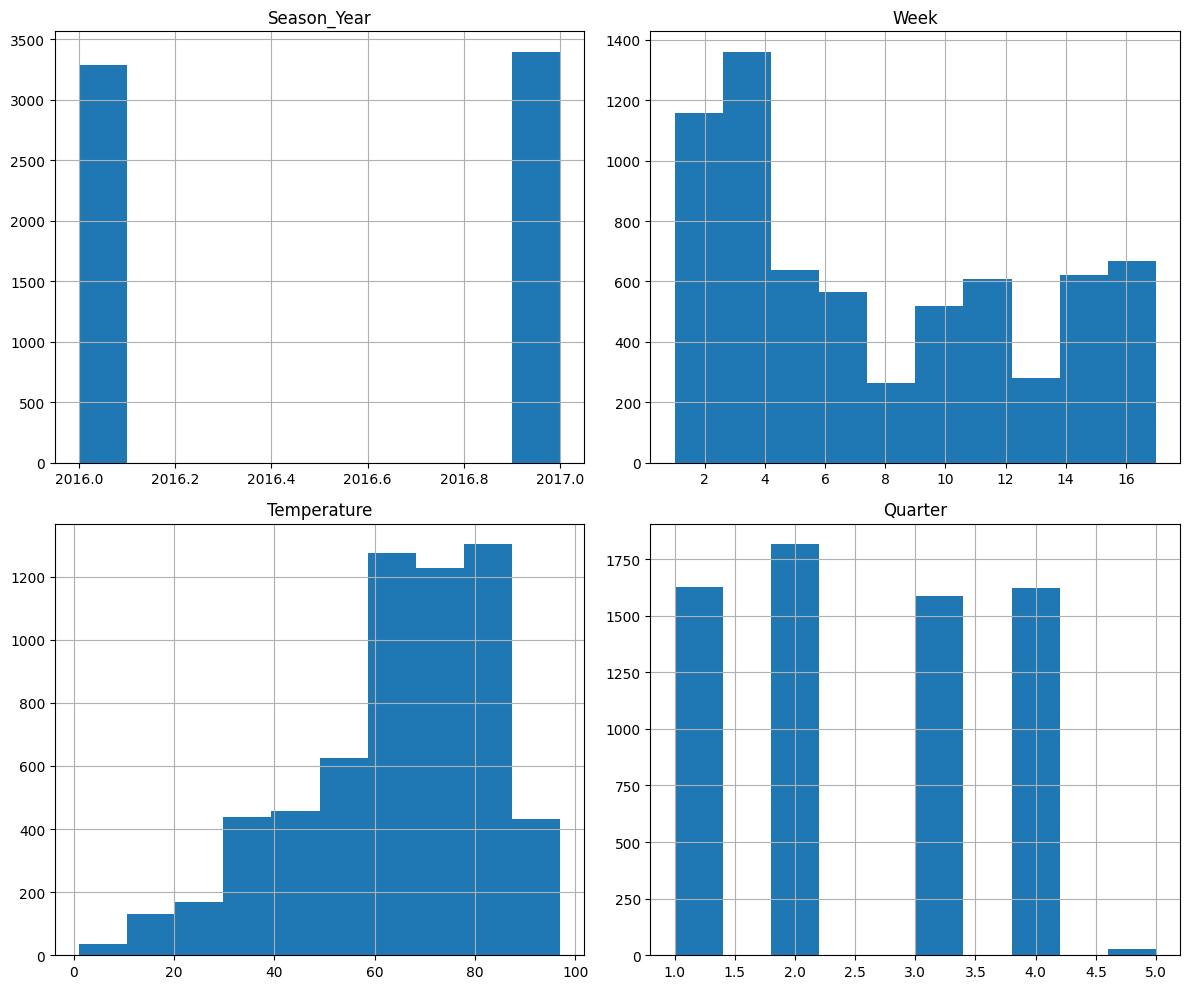

In [93]:
merged_game_data_numeric_hist = merged_game_data_numeric[['Season_Year', 'Week', 'Temperature', 'Quarter']]

hist_for_numeric_data(merged_game_data_numeric_hist)

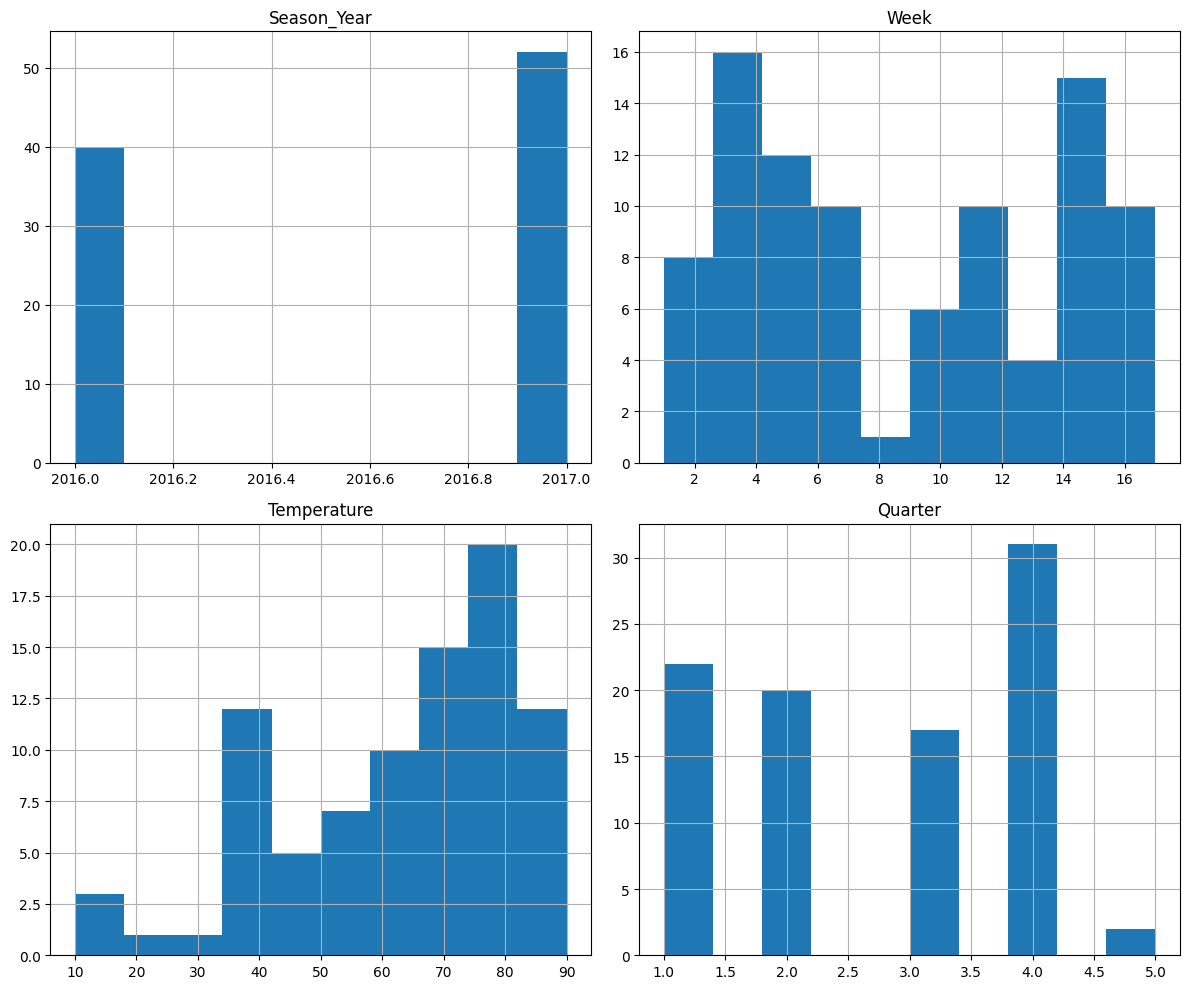

In [95]:
# PLAYS IN WHICH INJURIES OCCURED
Injury_game_data_numeric_hist = merged_game_data_numeric1[['Season_Year', 'Week', 'Temperature', 'Quarter']]


hist_for_numeric_data(Injury_game_data_numeric_hist)

#### **Analysis of Histograms**
Out of the numeric variables available, the only ones that really make sense for this analysis are Temperature and Week, Quarter, and Season_Year. 


When we compare the total dataset to the punt plays where there were injuries, A few differences stick out. 
- First, in the *injury* data, there is a bit of a spike around the 30 - 40 degrees range. Additionally, while there was a second peak in punt plays around the 60 - 70 degree range, there was a lack of injuries around this range. 

- Additionally, there were differences in the Week number between Injury plays and non-injury plays were striking in two different places, there seemed to be a spike in the number of injuries that occured during punts in Week 11 and Week 14. There also seemed to be a lack of injuries per-punt-play around the Week 2 mark.

- Finally, while the number of punt plays that happened throughtout a game remained relatively consistent. Theere was a relative decrease in the number of injuries that happened during those plays in quarters 1- 3 and a relative increase in injuries taht occured in quarter 4. 

#### **BoxPlots**

In [46]:
def boxplots(df):
    num_cols = len(df.columns)  
    rows = 3  
    cols = 4  
    total_plots = min(num_cols, rows * cols)  
    
    fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  
    axes = axes.flatten()  

    for i, col in enumerate(df.columns[:total_plots]):  
        df.boxplot(column=col, ax=axes[i]) 
        axes[i].set_title(f"Boxplot for {col}")  

    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j]) 

    plt.tight_layout()  
    plt.show()

#### All Punt Plays

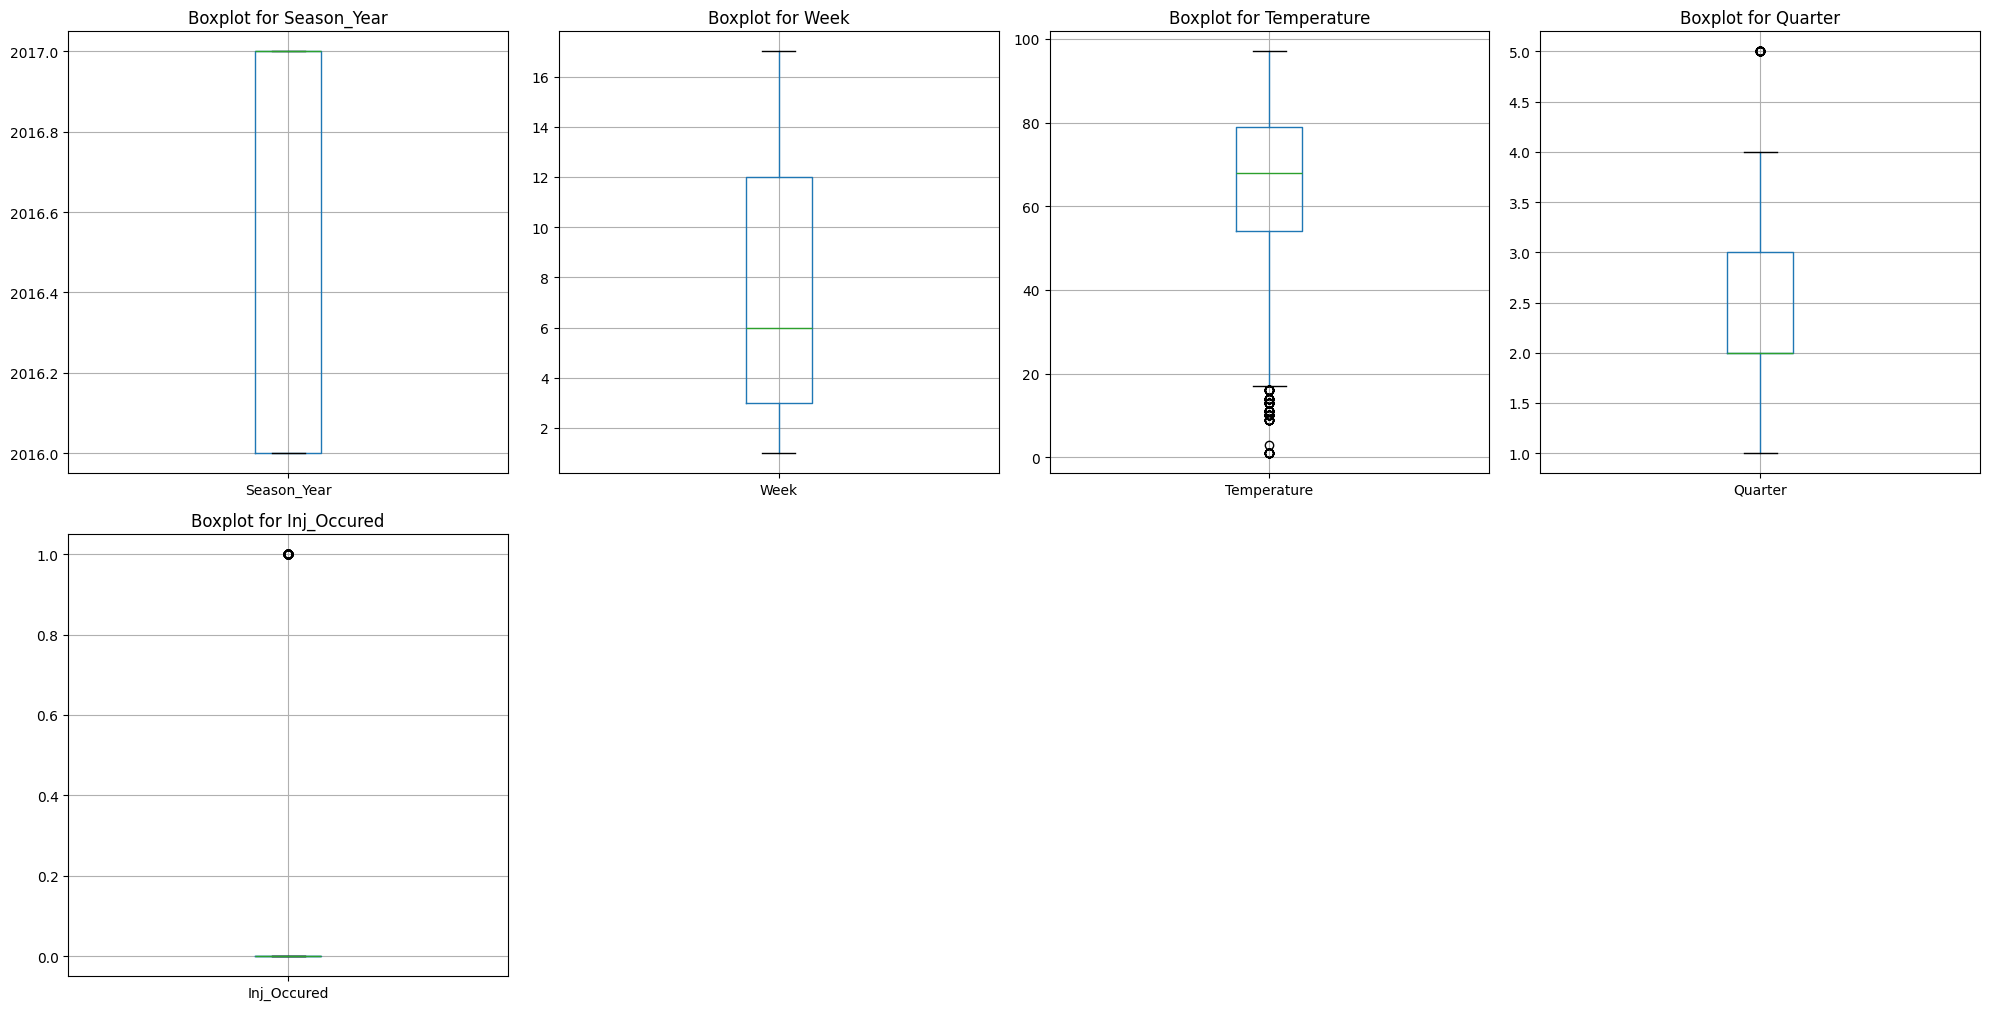

In [47]:
boxplots(merged_game_data_numeric)

#### Punt Play Injuries

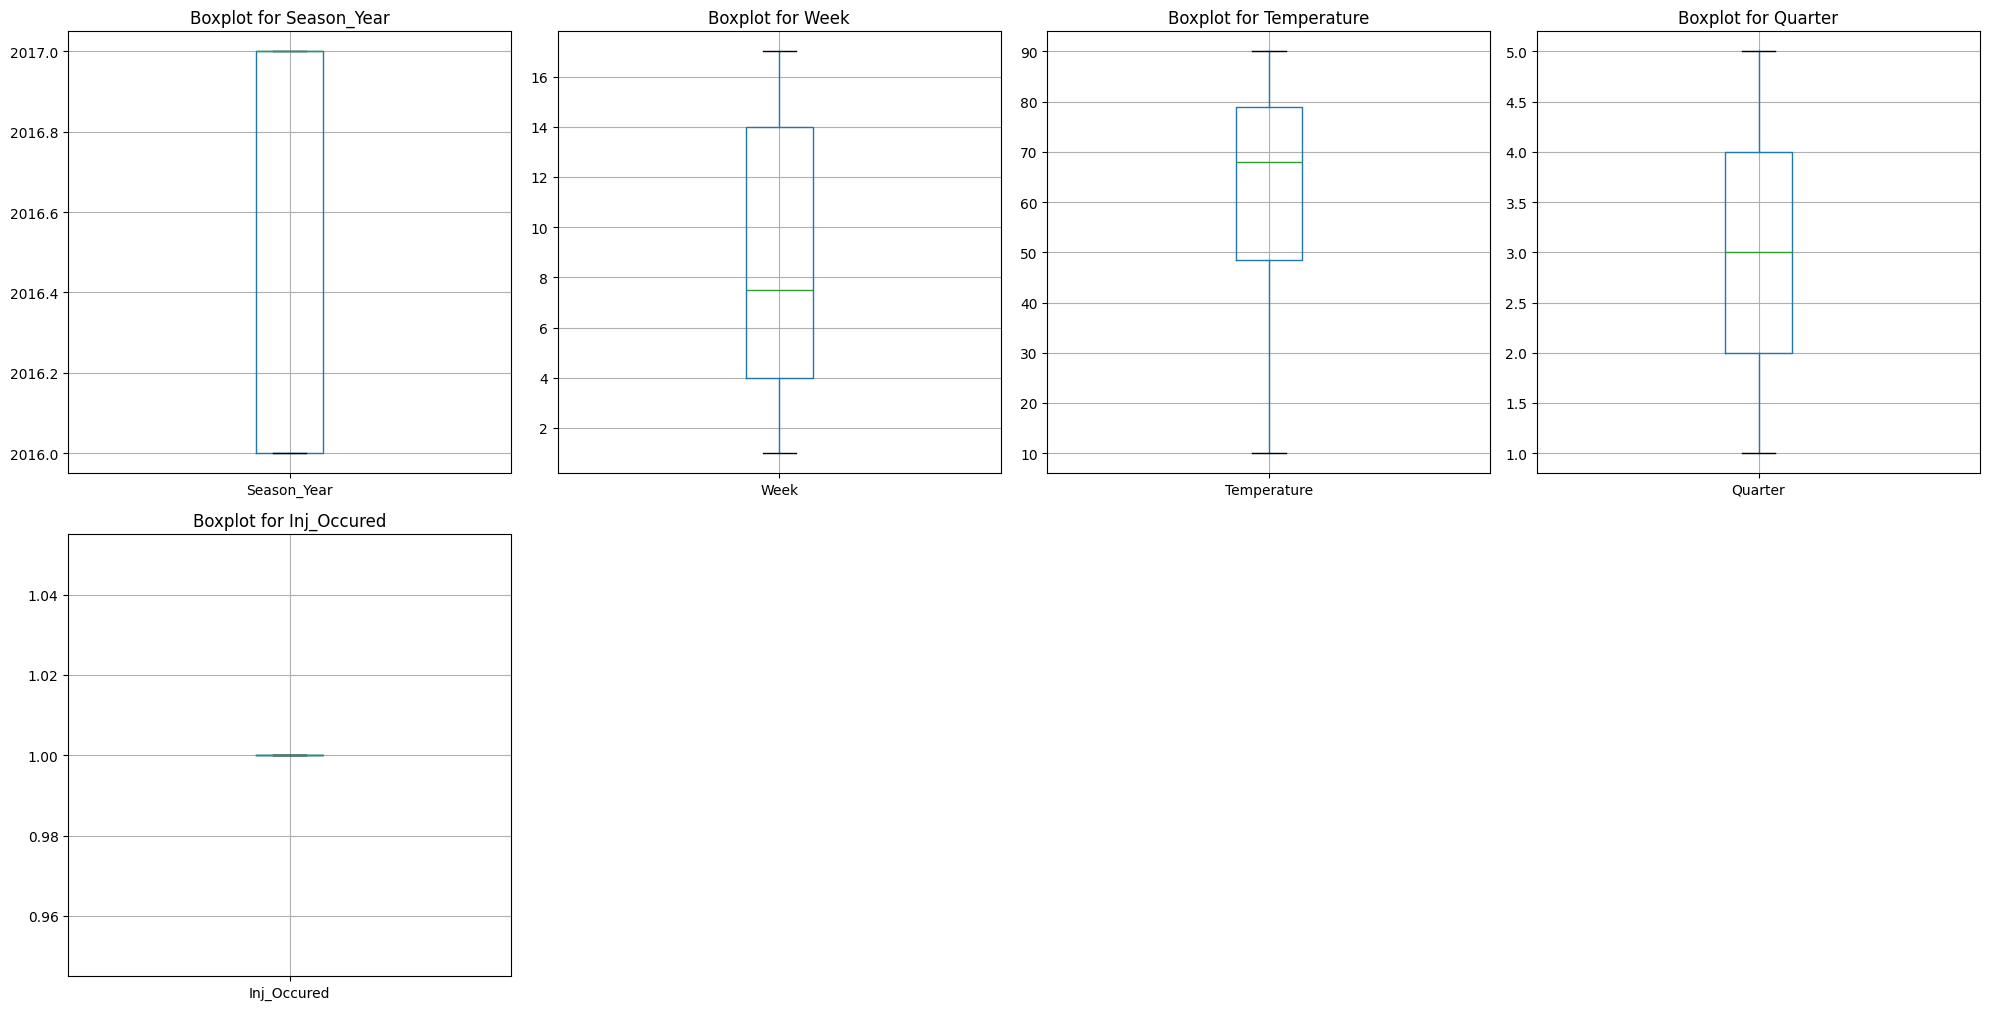

In [48]:
boxplots(merged_game_data_numeric1)

#### Box Plot Analysis


While there were a few outliers when it came to punt plays overall:
 - **Temperature:** there were a few punts that occured during exceptionally cold circumstances, which we can just place as due to weather anomalies. 
 - **QuarterL** there were a few punts that happened during Q5 which would be indicative of a play occuring in overtime.
 - **Injury Prevalence:** Injury occurance was considered an outlier itself. 
 

 It is very important to note that 


  ***None of these trends correlated to trends in Injuries***


In fact, there were no numeric outliers when it came to injury plays. -- While this could be due to a low sample size of 92 records, it is important to state for the record. 

___

## **Univariate Analysis Overview**

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

**1) Summarize the datasets using info() and describe()**

- When it came to summary - level statistics of the dataset, no anomylous data was found. The averages, mins, and maxes of each column, nothing was out of the ordinary. (Temperatures seemed reasonable and within range, week and season_Year were both centered in the middle of their respective ranges with no outliers. Etc.)

There were some null values in a couple of the columns but 

**2) Are there any duplicate rows?**


So there were no duplicate rows in the dataset.

**3) Are there any duplicate values in a given column (when this would be inappropriate?)**

- After looking over the 'duplicate' values in each of the columns, none really seem out of place. The only duplicate values that would typically take place in the columns were in categorical data columns (This is totally natural). 

- The only thing that seemed somewhat out of place with this was the duplicates found in the Game_Date column (at first I thought it was rather suspicious that there were 5- 6 games occuring with an 8-11-2016 date at 00:00:00) But I suspect this is more due to formatting in the original CSVs than a data entry error. This date also corresponds to the pre-season games so it makes sense that a large number of teams were playing on the same day on the first game of the season.

**4) What are the mean, median, and mode of each column?**

This is detailed in the Output of cell [51]:


**5) Are there any missing or null values?**

- There were a large number of missing or null values in the OutdoorWeather and the GameWeather columns (with 2,602 nulls and 930 nulls accordingly). To address this, the two columns were compared with each other -- if one of the columns was null then the value of the other column was used to backfill it and vice versa.  

-   **5.a) Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?**

- Subsequent to the weather column-data-backfill, there were only a few columns where null values occured: 

| Feature         | Missing Values | Percentage | Type        |
|----------------|---------------|------------|------------|
| Temperature    | 586           | 8.77%      | Numeric    |
| GameWeather   | 405           | 6.06%      | Categorical |
| OutdoorWeather| 405           | 6.06%      | Categorical |
| StadiumType   | 381           | 5.70%      | Categorical |
| Turf          | 9             | 0.13%      | Categorical |


- Because these only effect a small percentage of the dataset overall (less than 10%) we can generally assume it's ok for now. If these variables prove to be important or correlated to the target variable in bivariate analysis, then we can look into reducing this even more or dropping the columns if they prove to be not applicable. 

**6) Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)**


- It looks like there are some inconsistancies with the way that Weather and Stadium Types were recorded in the dataset. This happened in the first and Furure dataset as well. 

**7) Encode any categorical variables (e.g. with one-hot encoding.)**

- There are over 20 columns in this dataset and there are dozens (hundreds in some cases) of different categorical variable *types* in each. *IF* these columns prove useful in Bivariate Analysis and *subsequent* to any further data cleaning attempts. These variables will be one-hot encoded, that being said, it is not useful to bivariate analysis to increase our column number to > 1,000 columns. 


### **Conclusions:**

**8) Are the data usable?  If not, find some new data!**

- Yes, I would say that the data are relatively usable at this point. 

**9) Do you need to modify or correct the data in some way?**

- There will be an effort to condense the stadium type and weather columns so that they are better standardized. This will also be used to bring the standardization of *this* dataset in-line with the NFL First and Future dataset as well. 

**10) Is there any class imbalance?  (Categories that have many more items than other categories).**

- Yes, as with the other datasets, there are major class imbalances when it comes to injury occurances. (Because injury only occurs as a very small rate, it's technically considered an outlier.) As with the other datasets, this will have to be corrected before a final correlation matrix is obtained. 


____

# **Bivariate Analysis**

In [49]:
def corr_heatmap(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(),
                annot=True,
                fmt=".2f", 
                cmap="coolwarm",
                linewidths=0.5)
    plt.title(f"Correlation Heatmap")
    plt.show()

#### **All Plays**

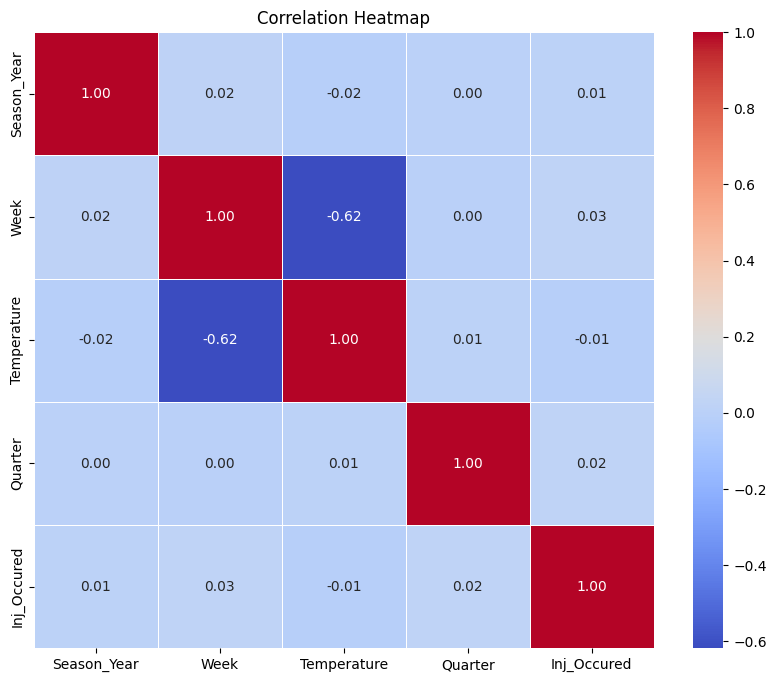

In [50]:
corr_heatmap(merged_game_data_numeric)

#### **Filtered: Only Plays that Ended in Injury**

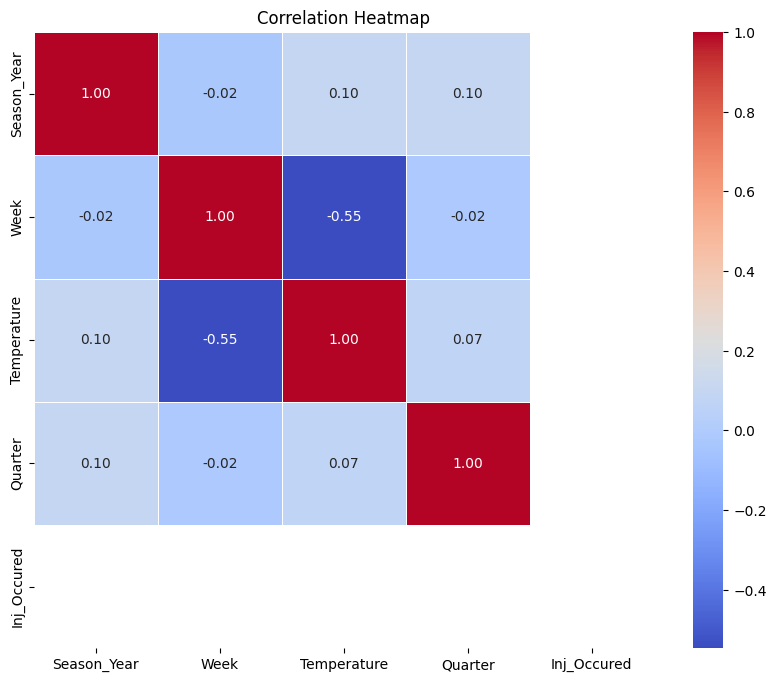

In [51]:
corr_heatmap(merged_game_data_numeric1)

#### **Pair-Plots: All game Data**

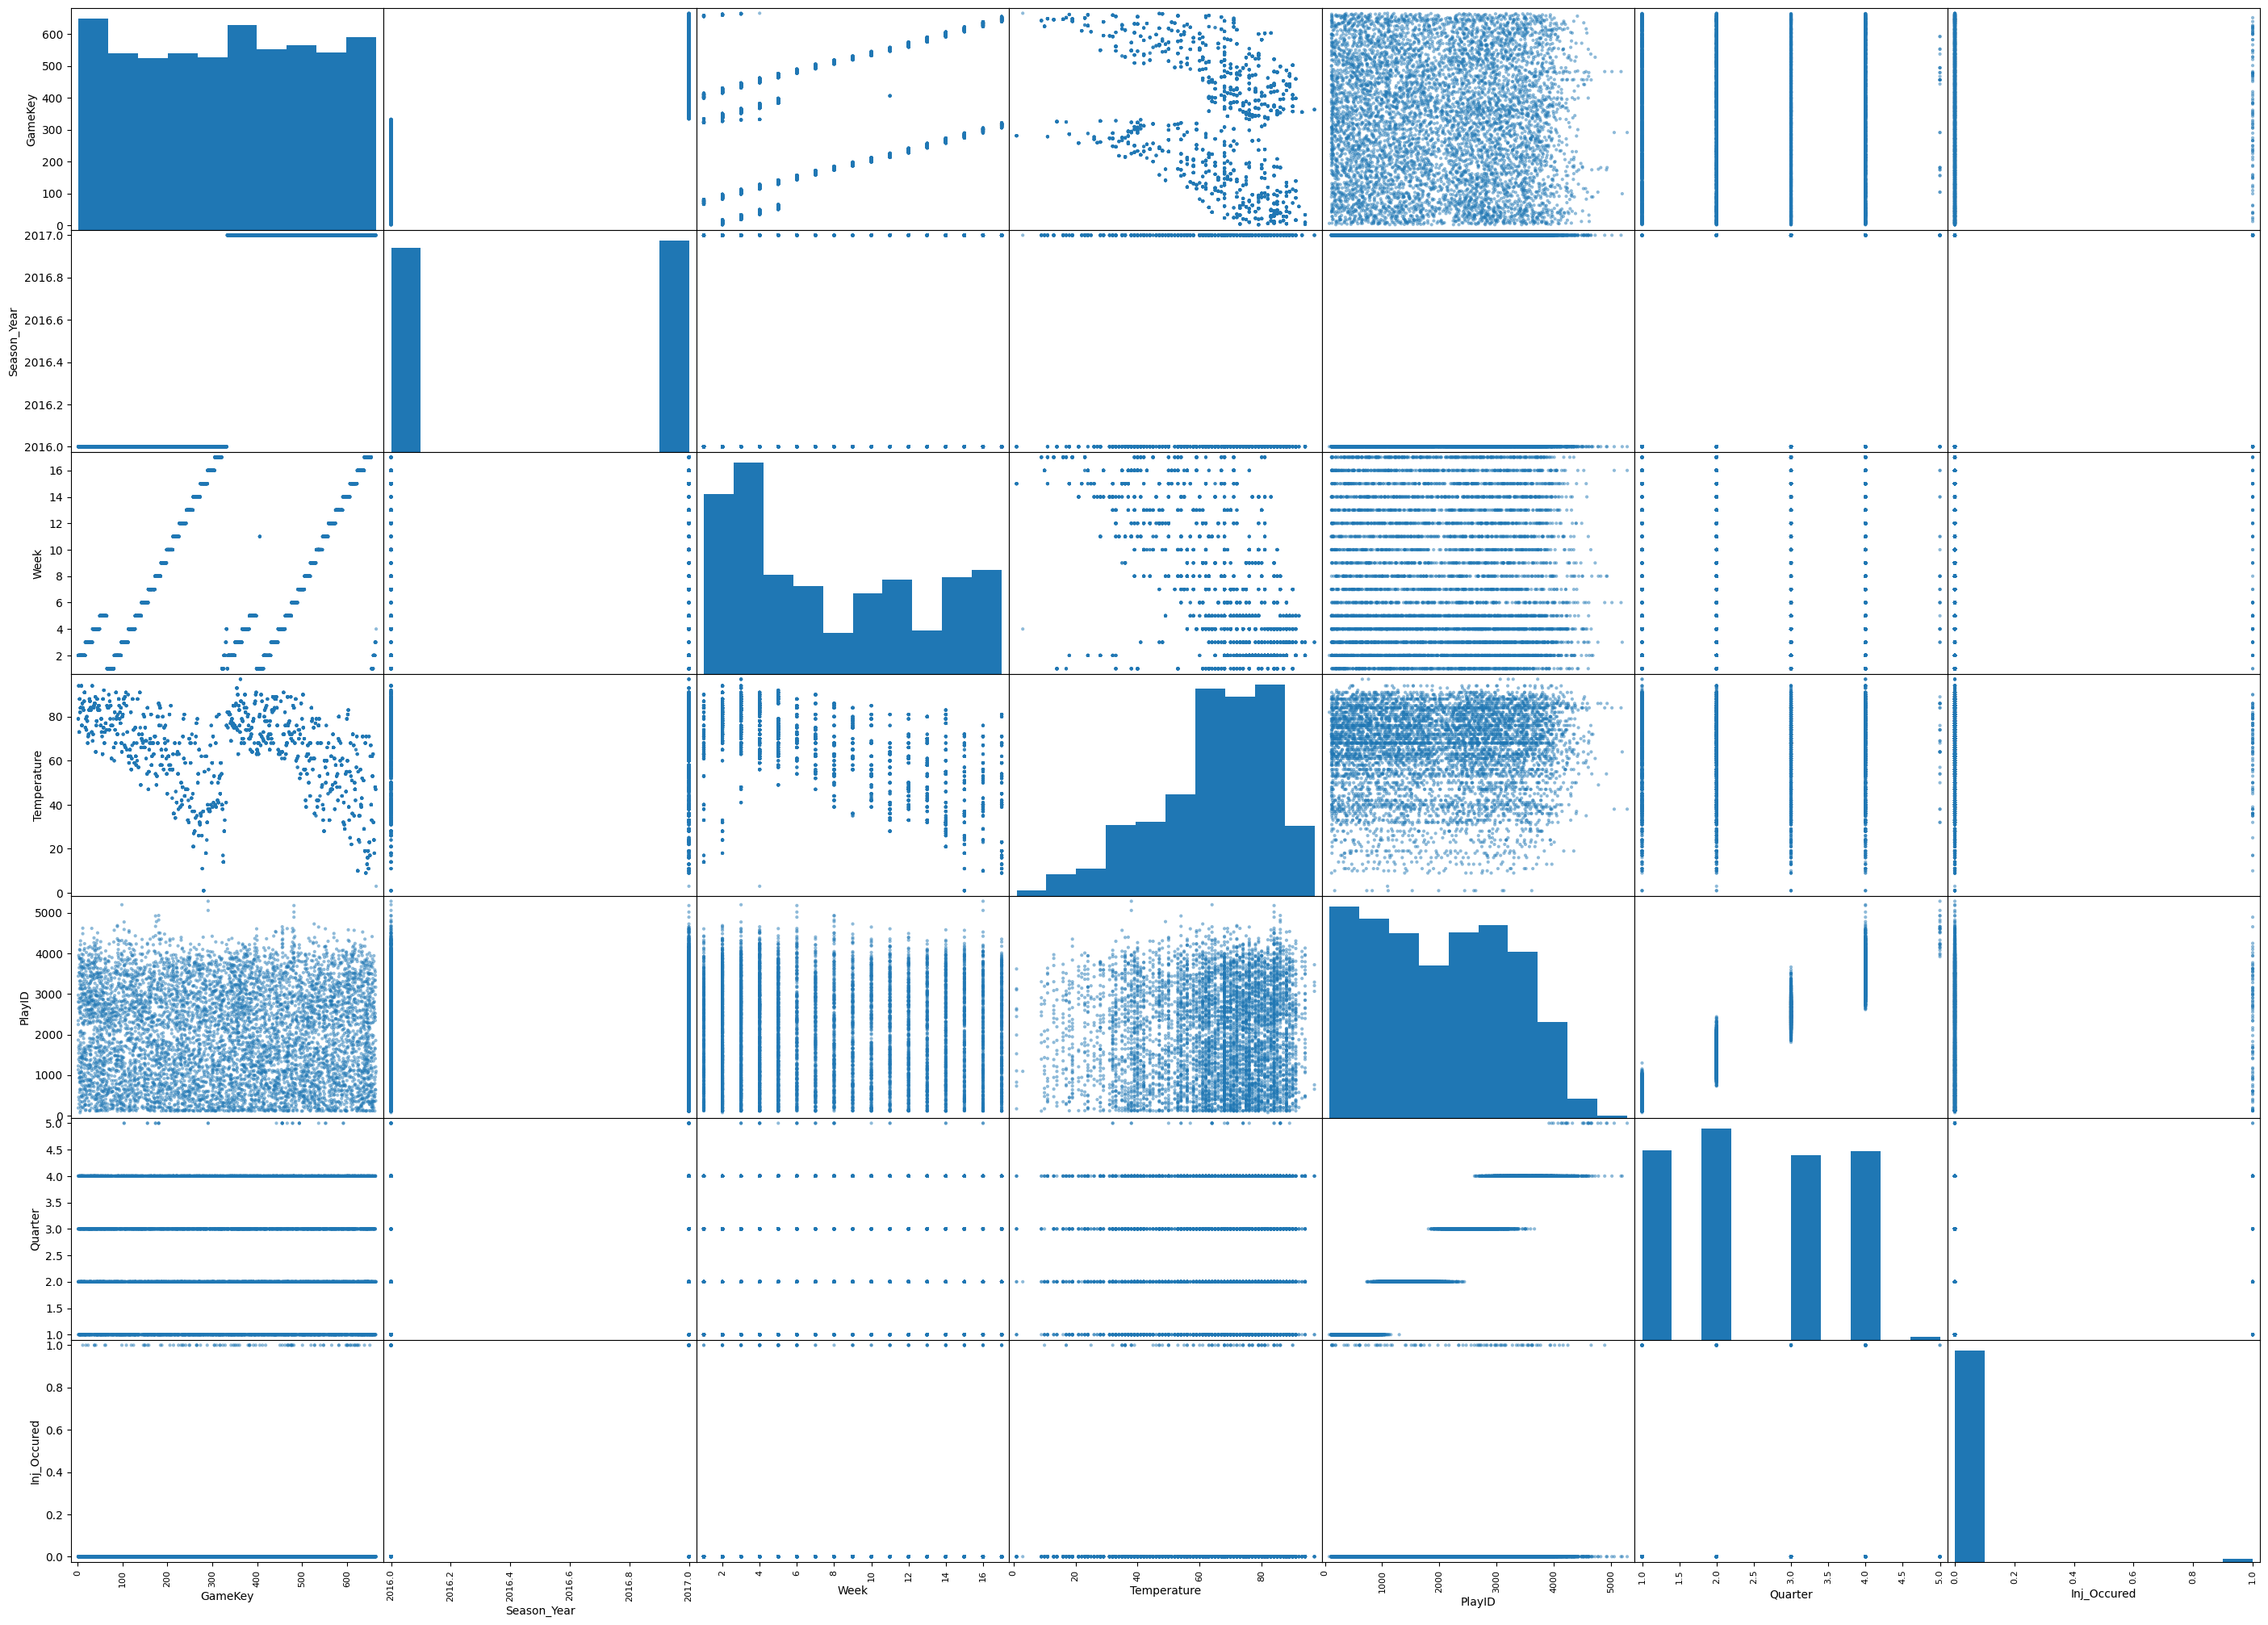

In [52]:
axes = pd.plotting.scatter_matrix(
    merged_game_data,
    c=None,
    alpha=0.5,
    figsize=(35, 25),
    diagonal='hist', 
)
for ax in axes.flatten():
    ax.tick_params(axis="y", labelsize=10) 

plt.show()

# **BiVariate Analysis Conclusions:**

# *Conclusions:*

**- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!**

While I would say that the dataset cleaning operation has been very successful, there are still some major class imbalances that we will have to correct for before being able to draw any meaningful conclusions from the data. 


**- Do you see any outliers?  (Data points that are far from the rest of the data).**


In the dataset representing *all punt plays* there are outliers for: 

- Quarter (some datapoints occur in Overtime)
- Temperature (some data points occur below 20 degrees fahrenheit)
- Injury_Occured ( Injury Occurance itself is considered an outlier.)

**- Are any data items highly correlated with each other, suggesting that they are redundant?**

Of all of the numerical columns, it would seem taht Temperature and Week have a negative correlation to each other. This would make sense as the season starts at the end of August and continues into the month of February (winter), so as the weeks of the season continue, the temperature gets colder. 

At this time (before correction for class imbalances) there are no other discernable correlations between the numeric values in the dataset. 

**- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?**

As these injuries are not evolving over time, the use of line plots for a time series analysis is not relevant to this specific analysis. 

**- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)**

At this point, I cannot think of any confounding variables given the data we have. That being said, however, this all may change when remediations have been effected and Categorical variables have been added in. 


___

# **Data Remediations**

In order to correct the class imbalances described above, a strategy was undertaken to undersample the injury plays. While we could also undertake a strategy to oversample the injury plays, the other datasets have much higher class imbalances than this dataset does and I ultimately felt that this would do too much to amplify the data patterns of an already small dataset. 

The following code was taken and adapted from ChatGPT: 
- https://chatgpt.com/share/67c9d8c4-b23c-800f-bb50-7475bf8c0d3a


Steps to oversample the injury data were taken out for this analysis. 

In [53]:
# pip install imblearn

In [54]:
from imblearn.under_sampling import RandomUnderSampler


injury_col = 'Inj_Occured'  


injury_plays = merged_game_data[merged_game_data[injury_col] == 1]
non_injury_plays = merged_game_data[merged_game_data[injury_col] == 0]

# Undersample non-injury plays (optional, keeping 3x injuries for balance)
undersample_ratio = 3 * len(injury_plays) 
non_injury_plays_sampled = non_injury_plays.sample(n=undersample_ratio, random_state=42)

# Combine undersampled non-injury plays with all injuries
balanced_df = pd.concat([injury_plays, non_injury_plays_sampled])


print("Resampled dataset shape:", balanced_df[injury_col].value_counts())


Resampled dataset shape: Inj_Occured
0    276
1     92
Name: count, dtype: int64


Now let's filter by categorical and numeric columns so that we can repeat the bivariate analysis. 

In [55]:
balanced_df_numeric = balanced_df.select_dtypes(include=['number'])
balanced_df_categorical = balanced_df.select_dtypes(exclude=['number'])

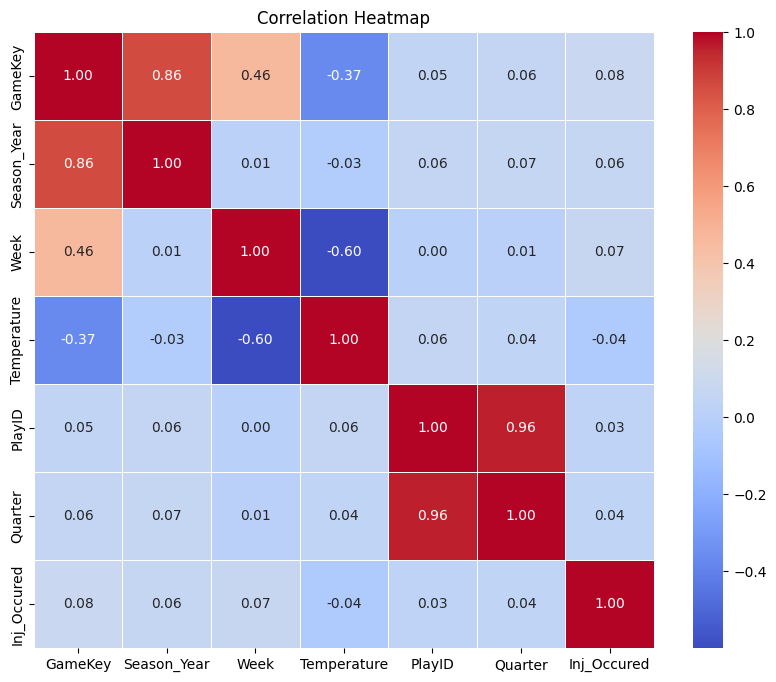

In [56]:
corr_heatmap(balanced_df_numeric)

It looks like none of the numeric Variables have significant correlations to the Injury Occurance model. Let's look into the categorical data more. 


The following was taken from my Week6 homework and originally adapted from ChatGPT:

- For the Categorical Variables, let's look up the likelihood that the particular column and the target variable (Injury Occurance) is due to chance. In this case, the lower the better and we are specifically looking for things under 5 %. 


Citation -- Conversation with ChatGPT:
-  https://chatgpt.com/share/67c1d8c7-98fc-800f-bfd8-b55d4730491a

In [57]:

def chi_square_test(df, target='Inj_Occured'):
    y = df[target]  # Boolean column
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns  # Select categorical columns

    results = {}
    for col in categorical_cols:
        table = pd.crosstab(df[col], y)  # Create contingency table
        chi2, p, dof, expected = stats.chi2_contingency(table)  # Perform Chi-Square test
        results[col] = p * 100 # Store p-value * 100 for readability

    return results  

For this, a p-value of 25 means that the correlation between the two variables has a 25% likelihood that it is due to chance. 

Normally, the bar for this is typically at 5%, but for this analysis (because the rate of injuries were so low, I'm looking into anything that is under 30%)

In [58]:
p_values = chi_square_test(balanced_df)

print("===== Unlikely Correlated to Injury Occurrence ===== \n")
for col, p in sorted(p_values.items(), key=lambda x: x[1], reverse=True):  
    if p >= 30:  
        print(f"p-value ({col}): {p:.2f}% (Correlation likely due to chance)")

print("\n\n===== Most Likely Correlated to Injury Occurrence ===== \n")
for col, p in sorted(p_values.items(), key=lambda x: x[-1], reverse=True):  
    if p < 30:  
        print(f"p-value ({col}): {p:.2f}% ('Significant' correlation)")

===== Unlikely Correlated to Injury Occurrence ===== 

p-value (Play_Type): 100.00% (Correlation likely due to chance)
p-value (Game_Day): 98.70% (Correlation likely due to chance)
p-value (Season_Type): 94.09% (Correlation likely due to chance)
p-value (Turf): 82.82% (Correlation likely due to chance)
p-value (Visit_Team): 77.10% (Correlation likely due to chance)
p-value (Score_Home_Visiting): 75.72% (Correlation likely due to chance)
p-value (StadiumType): 74.03% (Correlation likely due to chance)
p-value (Game_Clock): 61.64% (Correlation likely due to chance)
p-value (Poss_Team): 59.37% (Correlation likely due to chance)
p-value (Stadium): 48.35% (Correlation likely due to chance)
p-value (PlayDescription): 47.55% (Correlation likely due to chance)
p-value (Game_Date): 41.63% (Correlation likely due to chance)
p-value (YardLine): 40.36% (Correlation likely due to chance)
p-value (OutdoorWeather): 36.34% (Correlation likely due to chance)


===== Most Likely Correlated to Injury Occ

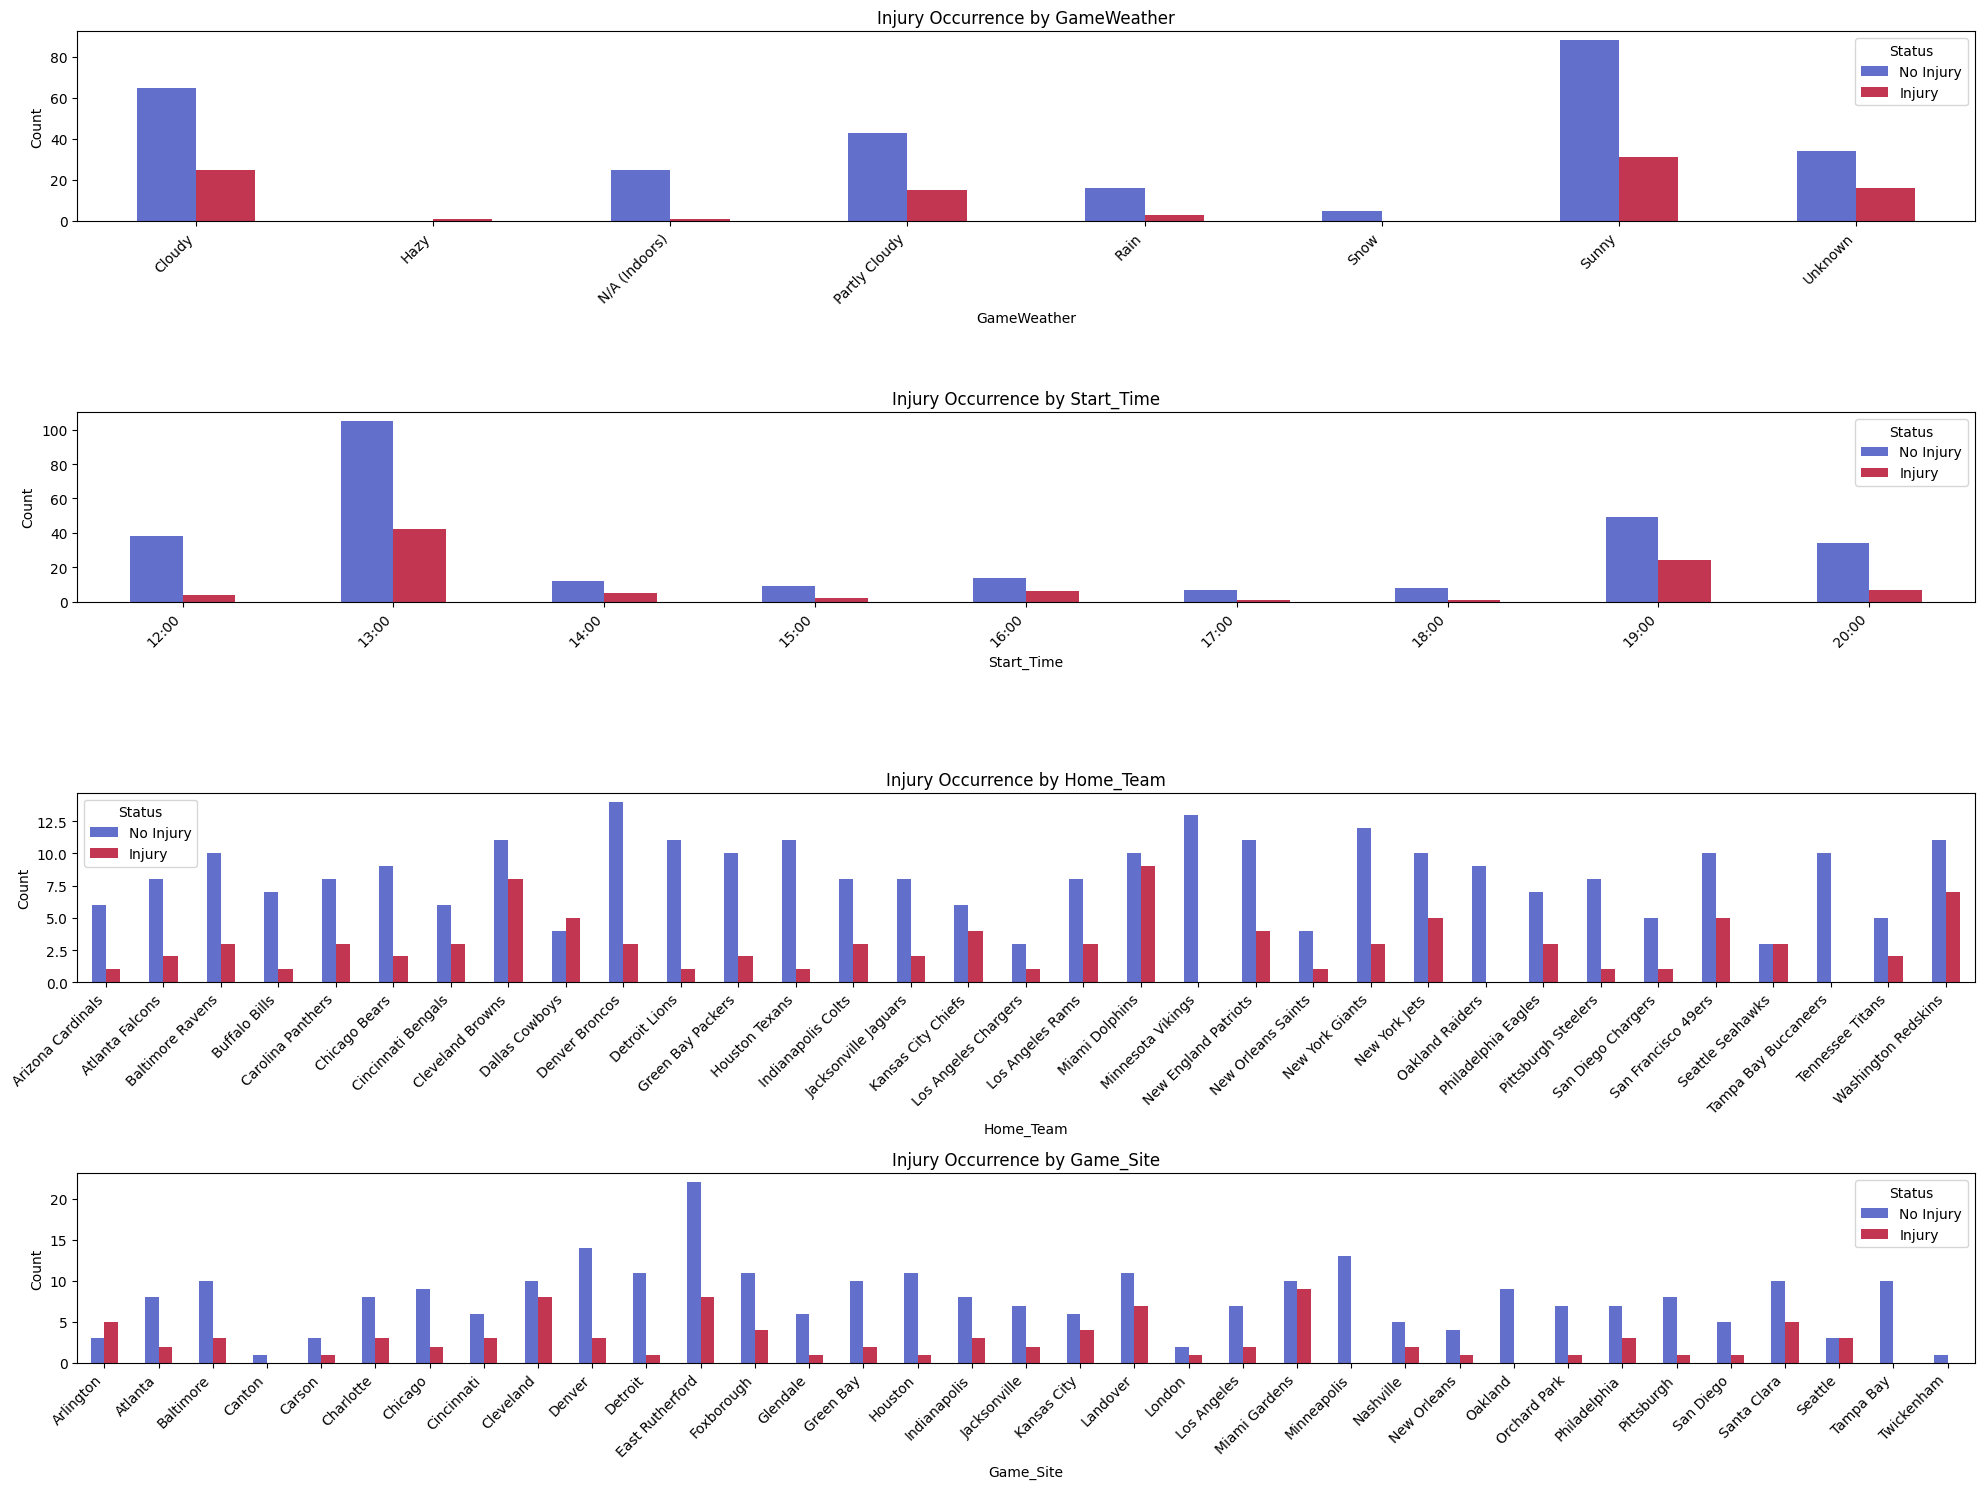

In [59]:

top_4_categorical_vars = sorted(p_values.items(), key=lambda x: x[1])[:4]  # 4 most significant
top_4_categorical_vars = [col for col, p in top_4_categorical_vars]  # Extract column names

fig, axes = plt.subplots(4, 1, figsize=(20, 15), sharey=False)  # Share y-axis for better comparison

# Iterate over top 4 categorical variables and plot them
for ax, col in zip(axes, top_4_categorical_vars):
    crosstab = pd.crosstab(balanced_df[col], balanced_df['Inj_Occured'])  # Get raw counts
    crosstab.plot(kind='bar', stacked=False, ax=ax, colormap='coolwarm', alpha=0.8)

    ax.set_title(f"Injury Occurrence by {col}")
    ax.set_ylabel("Count")  # Since we are using raw counts
    ax.set_xlabel(col)
    # ax.ylim(0, )
    ax.legend(["No Injury", "Injury"], title="Status")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt
plt.tight_layout()
plt.show()